In [1]:
### from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)


Toggle code

In [2]:
# all modules necessary for this nb
import os
import sys
import pickle

import numpy as np
import pylab as pl
import scipy.stats as sstats

# setting parameters for default matplotlib plots
%matplotlib inline

In [3]:
pl.style.use('fabiostyle')
# needs to find the library of functions
sys.path.append('../../code/')  # to be replaced!

import utils as ut
import plots as pt

In [4]:
# %%javascript
# var nb = IPython.notebook;
# var kernel = IPython.notebook.kernel;
# var command = "NOTEBOOK_NAME = '" + nb.base_url + nb.notebook_path + "'";
# kernel.execute(command);

In [5]:
# NOTEBOOK_NAME = NOTEBOOK_NAME.split('/')[-1][:-6]
NOTEBOOK_NAME = 'aha_combined_dhpc_cellreg'

In [6]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

Unable to restore variable 'add_significance', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'add_significance_line', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'sig_vs_chance', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'do_test_within', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'load_all_animals_vars', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)


In [7]:
from itertools import product
def load_all_animals_vars(varname, animal_list, pilot_list=None, notebook='preprocessing'):
    all_of_them = {}
    for ani in animal_list:
        folder = '../%s/notebooks/autorestore/%s/' % (ani, notebook)
        all_of_them.update({ani: ut.load_variable(varname, folder)})
    return all_of_them

In [9]:
from scipy.stats import sem
from matplotlib.lines import Line2D
def add_significance(ax, array1, array2, x1, x2, y, ticksize=0.02, sig_func=None, thresholds=(0.05, 0.01, 0.001),mcc=1):
    if sig_func is None:
        sig_func = lambda x, y: sstats.mannwhitneyu(x, y,)
    p = sig_func(array1, array2)[-1]
    print array1
    print array2
    print p
    sig_value = sig_func(array1, array2)[0]
    deltay = np.diff(ax.axis()[-2:])*ticksize
    line = Line2D([x1, x1, x2, x2], [y-deltay, y, y, y-deltay], lw=.5, color='k', clip_on=False)
    ax.add_line(line)
    ax.text(np.mean([x1, x2]), y+1,
            'n.s.' if p > thresholds[0]/mcc else
            '*' if p > thresholds[1]/mcc else
            '**' if p > thresholds[2]/mcc else
            '***',
            ha='center', fontsize=5)
    return sig_value, p

In [10]:
def report_stats (array1, array2, sig_func=None,mcc=1):
    if sig_func is None:
        sig_func = lambda x, y: sstats.mannwhitneyu(x, y, alternative='two-sided')
        U = sig_func(array1, array2)[0]
        z = ((U-((loops*loops)/2))/(np.sqrt(((loops*loops)*(loops+loops+1))/12)))
        r = z/np.sqrt(loops*2)
        p = sig_func(array1, array2)[-1]
        print "U =",U,"p =",p*mcc,"r =",r
    if sig_func is 'ttest':
        sig_func = lambda x, y: sstats.ttest_ind(x, y)
        cohens_d = (np.mean(array1)-np.mean(array2))/np.sqrt((np.std(array1)**2+np.std(array2)**2)/2)
        p = sig_func(array1, array2)[-1]
        print sig_func(array1, array2),"d =", cohens_d, 'corrected p =',p*mcc
    if sig_func is 'fishers':
        table = array1,array2
        sig_func = lambda x: sstats.fisher_exact(x, alternative='two-sided')
        p = sig_func(table)[-1]
        odds_ratio = sig_func(table)[0]
        print "odd's ratio =", odds_ratio, 'corrected p =',p*mcc
        

def report_stats_chance (array1, chance=0.5, sig_func=None,mcc=1):
    if sig_func is None:
        sig_func = lambda x: sstats.wilcoxon(x)
        subtracted = [x-chance for x in array1]
        U = sig_func(subtracted)[0]
        z = ((U-((loops*loops)/2))/(np.sqrt(((loops*loops)*(loops+loops+1))/12)))
        r = z/np.sqrt(loops*2)
        print sig_func(subtracted),"r =",r
    elif sig_func is 'ttest':
        sig_func = lambda x, y: sstats.ttest_1samp(x,y)
        cohens_d = (np.mean(array1)-chance)/np.std(array1)
        print sig_func(array1,chance),"d =",cohens_d

In [11]:
#all_animals =  'c3f3','c3f2','c3m1', 'c3m2', 'c4m3',         'c10m8', '90', '91', '92','93'
#expo_animals = 'c3f3','c3f2','c3m1', 'c3m2', 'c4m3', 'c4m4', 'c10m8', '90', '91', '92','93'
#pre_animals =  'c3f3','c3f2','c3m1', 'c3m2', 'c4m3', 'c4m4', 'c10m8', '90', '91', '92','93'
#post_animals = 'c3f3','c3f2','c3m1', 'c3m2', 'c4m3', 'c4m4', 'c10m8', '90', '91', '92','93'
#renew_animals ='c3f3','c3f2','c3m1', 'c3m2', 'c4m3',         'c10m8', '90', '91', '92','93'
#ext2_animals = 'c3f3','c3f2','c3m1', 'c3m2', 'c4m3', 'c4m4', 'c10m8', '90', '91', '92','93'
#ext1_animals = 'c3f3','c3f2','c3m1', 'c3m2', 'c4m3', 'c4m4', 'c10m8', '90', '91', '92','93'

#removed 92, which learns end of day2
four_animals = 'dhpcg20','dhpc24','dhpc35','dhpc36'
five_animals = 'dhpcg1',
all_animals = 'dhpcg1','dhpc24','dhpc35','dhpc36'
d1_animals  = ('dhpcg1','dhpc35')
d2_animals  = ('dhpc24','dhpc36')

# do day 1 and day 2 but ignore mice that are cut off
# in OFC could decode CS right before AHA

#compare decoding odor and trace, 

#vijay cross time bin decoders, selectivity isn't as striking

#should include catch trials when discussing expect outcome




In [535]:
patterns_tb = {}
labels = {}
found = {}

for ani in all_animals:

    exec("patterns_tb[ani] = ut.load_variable('patterns_tb','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    exec("labels[ani] = ut.load_variable('labels','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    exec("found[ani] = ut.load_variable('found_ind','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    
loop_opt = [10,20,30,40]

founds = ['b','a']
#for loo in loo_opt:
    #for ani in animals:
for f in founds:
    for loo in loop_opt:
        for t in range(0,16):
            exec('patterns_tb_%s_%s_%s = {}'%(f,loo,t,))
            exec('labels_%s_%s = {}'%(f,loo,))
            for ani in all_animals:
                try:
                    exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb['%s'][%s]"%(f,loo,t,ani,ani,t))
                    if f == 'b':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']-loo:found['%s']]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']-loo:found['%s']]"%(f,loo,ani,ani,ani,ani))
                    elif f == 'a':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']:loo+found['%s']]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']:loo+found['%s']]"%(f,loo,ani,ani,ani,ani))

                except IOError as error:
                    print error
                continue    



In [536]:
found

{'dhpc24': 206, 'dhpc35': 63, 'dhpc36': 129, 'dhpcg1': 73}

In [537]:
#delta_t0 = 1
#
#t_start0 = -5  # sec
#t_stop0 = 11  # sec

In [538]:
#for sess in ['pre']:
#    exec("labels_tb_%s = {}"%sess)
#    for ani in eval('%s_animals'%sess):
#        exec("labels_tb_%s[%s] = np.r_[[[l]*patterns_tb_%s[%s].shape[0] for l in labels_%s[%s]]].T"%(sess,ani,sess,ani,sess,ani))

In [539]:
#labels_tb_pre = {}
#
#labels_tb_pre['c3f3'] = np.r_[[[l]*patterns_tb_pre['c3f3'].shape[0] for l in labels_pre['c3f3']]].T

In [12]:
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.svm import SVC

def do_test_within(patterns, labels, n_cells=None):
#     which_train = range(90)
#     which_test = range(90)
#    cv =LeaveOneOut()
    
    which_train = {}
    which_test = {}
    for ani in patterns.keys():
        which_train_a = np.random.permutation(np.where(labels[ani]==0)[0])
        which_test_a = which_train_a[:len(which_train_a)/2]
        which_train_a = which_train_a[len(which_train_a)/2:]
        
        which_train_b = np.random.permutation(np.where(labels[ani]==1)[0])
        which_test_b = which_train_b[:len(which_train_b)/2]
        which_train_b = which_train_b[len(which_train_b)/2:]
        
        which_train[ani] = np.concatenate((which_train_a, which_train_b))
        which_test[ani] = np.concatenate((which_test_a, which_test_b))
    
    patterns_t = patterns.copy()
    labels_t = labels.copy()
    patterns_T = patterns.copy()
    labels_T = labels.copy()
    for ani in patterns.keys():
        patterns_t[ani] = patterns[ani][which_train[ani]]
        labels_t[ani] = labels[ani][which_train[ani]]
        patterns_T[ani] = patterns[ani][which_test[ani]]
        labels_T[ani] = labels[ani][which_test[ani]]
    patterns_comb_train, labels_comb = ut.combine_patterns(patterns_t, labels_t)
    patterns_comb_test, labels_comb = ut.combine_patterns(patterns_T, labels_T)
    
    if n_cells is None:
        cells = list(range(patterns_comb_train.shape[1]))
    else:
        cells = np.random.choice(range(patterns_comb_train.shape[1]), size=n_cells, replace=False)
        
    decoder.fit(patterns_comb_train[:, cells], labels_comb)
    scores = decoder.score(patterns_comb_test[:, cells], labels_comb)
    decoder.fit(patterns_comb_test[:, cells], labels_comb)
    return np.append(scores, decoder.score(patterns_comb_train[:, cells], labels_comb))

In [541]:
decoder = SVC(kernel='linear', decision_function_shape='ovo')

In [543]:
n_loops = 10
loop_opt = 30

for i in range(100):
    if i == 0:
        for t in [6,8]: # number of time bins
            for f in founds: 
                    exec('m_scores_tb_%s_30_%s = []'%(f,t))
                    exec('scores_tb_%s_30_%s = []'%(f,t))
                    print t,
                    exec("p_str = patterns_tb_%s_30_%s"%(f,t,))
                    exec("l_str = labels_%s_30"%(f,))
                    exec("scores_tb_%s_30_%s.append(np.r_[[do_test_within(p_str,l_str) for i in range(n_loops)]])"%(f,t,))
                    exec("m_scores_tb_%s_30_%s.append(np.mean(scores_tb_%s_30_%s[0],axis=1))"%(f,t,f,t))
                    #exec('avg_scores_first_%s_30_%s = scores_tb_%s_30_%s'%(f,t,f,t))
        
    else:
        for t in [6,8]: # number of time bins
            for f in founds: 
                exec('scores_tb_%s_30_%s = []'%(f,t))
                print t,
                exec("p_str = patterns_tb_%s_30_%s"%(f,t,))
                exec("l_str = labels_%s_30"%(f,))
                exec("scores_tb_%s_30_%s.append(np.r_[[do_test_within(p_str,l_str) for i in range(n_loops)]])"%(f,t,))
                exec("m_scores_tb_%s_30_%s.append(np.mean(scores_tb_%s_30_%s[0],axis=1))"%(f,t,f,t))
                #exec('avg_scores_second_%s_30_%s = scores_tb_%s_30_%s'%(f,t,f,t))
                #[do_test_within(eval('patterns_tb_%s_%s_%s'%(f,loo,t)),eval('labels_%s_%s'%(f,loo))) for i in range(n_loops)]
                #            eval("scores_tb_%s_%s_%s"%(f,loo,t)) = 


6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8

KeyboardInterrupt: 

In [544]:
np.mean(m_scores_tb_b_30_8)


0.67520454545454545

In [14]:
np.mean(m_scores_tb_a_30_8)


0.72342249999999997

In [546]:
np.mean(m_scores_tb_b_30_6)


0.77034090909090924

In [547]:
np.mean(m_scores_tb_a_30_6)


0.82570454545454564

In [548]:
np.mean(m_scores_tb_a_30_8)


0.72167500000000007

In [549]:
np.mean(m_scores_tb_a_30_6)


0.82570454545454564

In [550]:
np.mean(m_scores_tb_b_30_6)


0.77034090909090924

In [551]:
np.mean(m_scores_tb_b_30_8)


0.67520454545454545

In [542]:
n_loops = 10
loop_opt = 30



for i in range(100):
    if i == 0:
        for t in [6,8]: # number of time bins
            for f in founds: 
                    exec('avg_scores_first_%s_30_%s = []'%(f,t))
                    exec('scores_tb_%s_30_%s = []'%(f,t))
                    print t,
                    exec("p_str = patterns_tb_%s_30_%s"%(f,t,))
                    exec("l_str = labels_%s_30"%(f,))
                    exec("scores_tb_%s_30_%s.append(np.r_[[do_test_within(p_str,l_str) for i in range(n_loops)]])"%(f,t,))
                    exec("scores_tb_%s_30_%s = np.mean(scores_tb_%s_30_%s[0],axis=1)"%(f,t,f,t))
                    exec('avg_scores_first_%s_30_%s = scores_tb_%s_30_%s'%(f,t,f,t))
        
    else:
        exec('avg_scores_%s = []'%(i))
        for t in [6,8]: # number of time bins
            for f in founds: 
                exec('avg_scores_second_%s_30_%s = []'%(f,t))
                exec('scores_tb_%s_30_%s = []'%(f,t))
                print t,
                exec("p_str = patterns_tb_%s_30_%s"%(f,t,))
                exec("l_str = labels_%s_30"%(f,))
                exec("scores_tb_%s_30_%s.append(np.r_[[do_test_within(p_str,l_str) for i in range(n_loops)]])"%(f,t,))
                exec("scores_tb_%s_30_%s = np.mean(scores_tb_%s_30_%s[0],axis=1)"%(f,t,f,t))
                exec('avg_scores_second_%s_30_%s = scores_tb_%s_30_%s'%(f,t,f,t))
                #[do_test_within(eval('patterns_tb_%s_%s_%s'%(f,loo,t)),eval('labels_%s_%s'%(f,loo))) for i in range(n_loops)]
                #            eval("scores_tb_%s_%s_%s"%(f,loo,t)) = 

                exec('avg_scores_first_%s_30_%s = np.mean([avg_scores_second_%s_30_%s,avg_scores_first_%s_30_%s],axis=0)'%(f,t,f,t,f,t))

6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8


In [333]:
np.mean(avg_scores_first_b_30_8)


0.68034376604724611

In [15]:
np.mean(avg_scores_first_a_30_8)


0.72344961245514683

In [335]:
np.mean(avg_scores_first_b_30_6)


0.78845927134477978

In [336]:
np.mean(avg_scores_first_a_30_6)

0.80799571353579402

In [291]:
np.mean(avg_scores_first_a_30_8)

0.73756677150724614

In [292]:
np.mean(avg_scores_first_a_30_6)

0.801942727820108

In [293]:
np.mean(avg_scores_first_b_30_8)

0.65672865893872923

In [294]:
np.mean(avg_scores_first_b_30_6)

0.79970214860083755

In [532]:
sig_func = lambda x: sstats.wilcoxon(x)
chance = .5


subtracted = [x-chance for x in avg_scores_first_b_30_8]
tr = sig_func(subtracted)[-1]
p_thresh = .01
print tr

0.00506203212627


In [556]:
len(avg_scores_first_a_30_6)

10

[ 0.66881759  0.7222274   0.6500642   0.64674998  0.66655728  0.68924984
  0.71160162  0.67793608  0.70332489  0.66690878]
[ 0.71757904  0.74681172  0.77146729  0.74715112  0.72689208  0.74036573
  0.72119677  0.64492833  0.76616887  0.65193518]
0.0128740404106
[ 0.79046968  0.72294869  0.75987688  0.70818281  0.8344438   0.81377353
  0.80510291  0.85962243  0.80673888  0.78343311]
[ 0.80351729  0.80509835  0.83322985  0.74570547  0.75252204  0.82060832
  0.78214266  0.82603083  0.83488449  0.87621783]
0.236337796756


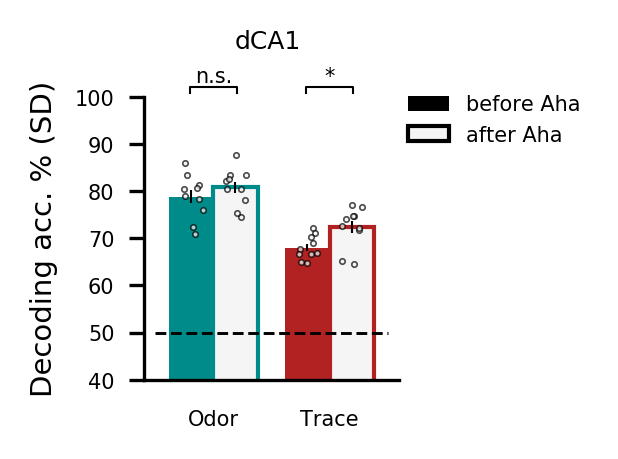

In [22]:
from matplotlib.patches import Patch
labels = ['Odor','Trace']
x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
#loops=10
v={}
d={}
to_plot = [1,2]

dark_co = ('forestgreen','darkcyan','firebrick','lightgrey','dimgrey','goldenrod')
fig, ax = pl.subplots(figsize=(1.1,1.25))
for c,i in zip(to_plot,range(2)):
    if c ==1:
        v = np.array(np.std(avg_scores_first_b_30_6)/np.sqrt(len(avg_scores_first_b_30_6))*100)
        ax.bar(i - width/2, np.mean(avg_scores_first_b_30_6)*100, width, color=dark_co[c],yerr=v)
        ax.scatter(i - width/2+np.random.random(avg_scores_first_b_30_6.size)*width/2-width/4.5,avg_scores_first_b_30_6*100,\
               color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')
        d = np.array(np.std(avg_scores_first_a_30_6)/np.sqrt(len(avg_scores_first_b_30_6))*100)
        ax.bar(i + width/2,  np.mean(avg_scores_first_a_30_6)*100, width,color='whitesmoke', edgecolor=dark_co[c],yerr=d)
        ax.scatter(i + width/2+np.random.random(avg_scores_first_a_30_6.size)*width/2-width/4.5,avg_scores_first_a_30_6*100,\
               color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')
    else:
        v = np.array(np.std(avg_scores_first_b_30_8)/np.sqrt(len(avg_scores_first_b_30_6))*100)
        ax.bar(i - width/2, np.mean(avg_scores_first_b_30_8)*100, width, color=dark_co[c],yerr=v)
        ax.scatter(i - width/2+np.random.random(avg_scores_first_b_30_8.size)*width/2-width/4.5,avg_scores_first_b_30_8*100,\
               color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')
        d = np.array(np.std(avg_scores_first_a_30_8)/np.sqrt(len(avg_scores_first_b_30_6))*100)
        ax.bar(i + width/2,  np.mean(avg_scores_first_a_30_8)*100, width,color='whitesmoke', edgecolor=dark_co[c],yerr=d)
        ax.scatter(i + width/2+np.random.random(avg_scores_first_a_30_8.size)*width/2-width/4.5,avg_scores_first_a_30_8*100,\
               color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')
        
ax.hlines(50,-.5,1.5, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Decoding acc. % (SD)')
#ax.set_title('Decoding During CS')
ax.set_ylim(40,100)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['before Aha','after Aha'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
pvs.append(add_significance(ax, avg_scores_first_b_30_8, avg_scores_first_a_30_8,-.2+1,0.2+1,102))
pvs.append(add_significance(ax, avg_scores_first_b_30_6, avg_scores_first_a_30_6,-.2+0,0.2+0,102))
        #max(np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('dCA1',y=1.06,fontsize=6)

fig.savefig('../final-ish figures/%s_aha_bars.pdf'%NOTEBOOK_NAME)

In [553]:
def report_stats (array1, array2, sig_func=None,mcc=1):
    if sig_func is None:
        sig_func = lambda x, y: sstats.mannwhitneyu(x, y, alternative='two-sided')
    U = sig_func(array1, array2)[0]
    z = ((U-((loops*loops)/2))/(np.sqrt(((loops*loops)*(loops+loops+1))/12)))
    r = z/np.sqrt(loops*2)
    p = sig_func(array1, array2)[-1]
    print "U =",U,"p =",p*mcc,"r =",r

In [554]:
report_stats(avg_scores_first_b_30_8,avg_scores_first_a_30_8)

U = 19.0 p = 0.0211339281292 r = -0.523995637932


In [557]:
report_stats(avg_scores_first_b_30_6,avg_scores_first_a_30_6)

U = 27.0 p = 0.0889730117018 r = -0.388770957175


In [237]:
n_loops = 10
for t in range(16): # number of time bins
    for loo in loop_opt:
        for f in founds: 
            exec('scores_tb_%s_%s_%s = []'%(f,loo,t))
            print t,
            exec("p_str = patterns_tb_%s_%s_%s"%(f,loo,t,))
            exec("l_str = labels_%s_%s"%(f,loo,))
            exec("scores_tb_%s_%s_%s = np.r_[[do_test_within(p_str,l_str) for i in range(n_loops)]]"%(f,loo,t,))
            exec("scores_tb_%s_%s_%s = np.mean(scores_tb_%s_%s_%s,1)"%(f,loo,t,f,loo,t))
            #[do_test_within(eval('patterns_tb_%s_%s_%s'%(f,loo,t)),eval('labels_%s_%s'%(f,loo))) for i in range(n_loops)]
            #            eval("scores_tb_%s_%s_%s"%(f,loo,t)) = 

0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 15 15 15 15 15 15 15 15


In [240]:
scores_tb_b_30_0

array([ 0.6075,  0.395 ,  0.585 ,  0.56  ,  0.4375,  0.4225,  0.485 ,
        0.33  ,  0.525 ,  0.4175])

In [251]:
scores_tb_b_10_0.shape[-1]

10

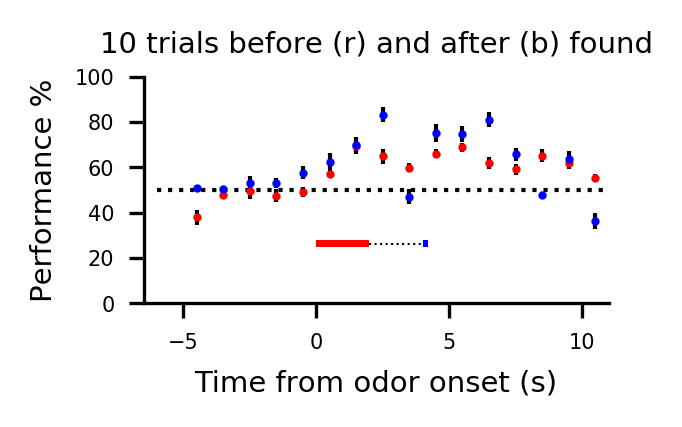

In [252]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_10_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_10_%s"%t))*100
    s = np.std(eval("scores_tb_b_10_%s"%t))*100 / np.sqrt(eval("scores_tb_b_10_%s"%t).shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_10_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_10_%s"%t))*100
    s = np.std(eval("scores_tb_a_10_%s"%t))*100 / np.sqrt(eval("scores_tb_a_10_%s"%t).shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('10 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

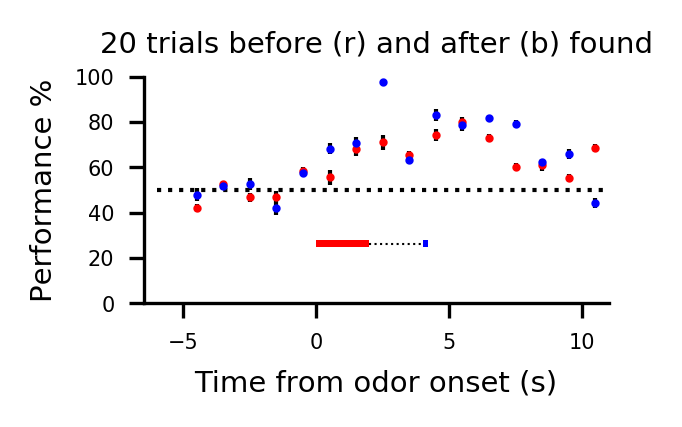

In [253]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_20_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_20_%s"%t))*100
    s = np.std(eval("scores_tb_b_20_%s"%t))*100 / np.sqrt(eval("scores_tb_b_20_%s"%t).shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_20_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_20_%s"%t))*100
    s = np.std(eval("scores_tb_a_20_%s"%t))*100 / np.sqrt(eval("scores_tb_a_20_%s"%t).shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('20 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

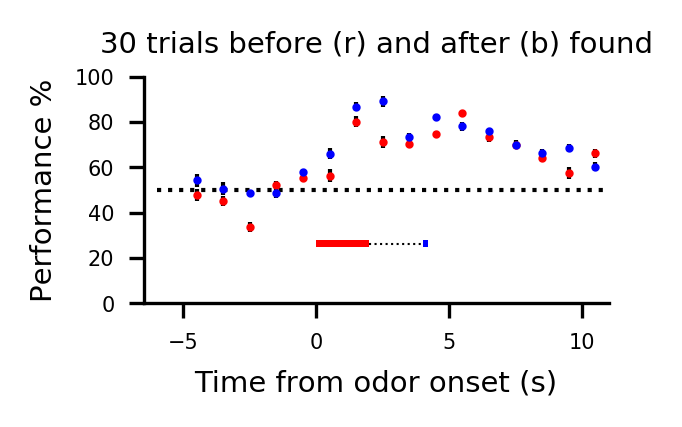

In [255]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_30_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_30_%s"%t))*100
    s = np.std(eval("scores_tb_b_30_%s"%t))*100 / np.sqrt(eval("scores_tb_b_30_%s"%t).shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_30_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_30_%s"%t))*100
    s = np.std(eval("scores_tb_a_30_%s"%t))*100 / np.sqrt(eval("scores_tb_a_30_%s"%t).shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('30 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

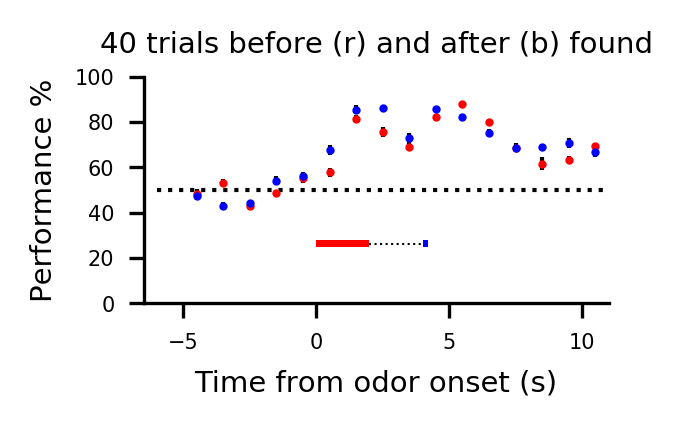

In [254]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_40_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_40_%s"%t))*100
    s = np.std(eval("scores_tb_b_40_%s"%t))*100 / np.sqrt(eval("scores_tb_b_40_%s"%t).shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_40_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_40_%s"%t))*100
    s = np.std(eval("scores_tb_a_40_%s"%t))*100 / np.sqrt(eval("scores_tb_a_40_%s"%t).shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('40 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

[ 0.8275  0.7225  0.875   0.855   0.72    0.83    0.7225  0.945   0.8     0.72  ]
[ 0.7475  0.9     0.9125  0.89    0.83    0.8     0.91    0.8575  0.86
  0.965 ]
0.0224561562055
[ 0.745   0.715   0.7075  0.6325  0.7275  0.73    0.74    0.67    0.7075
  0.6575]
[ 0.73    0.745   0.675   0.7675  0.7425  0.685   0.875   0.675   0.7525
  0.6775]
0.0926072290809


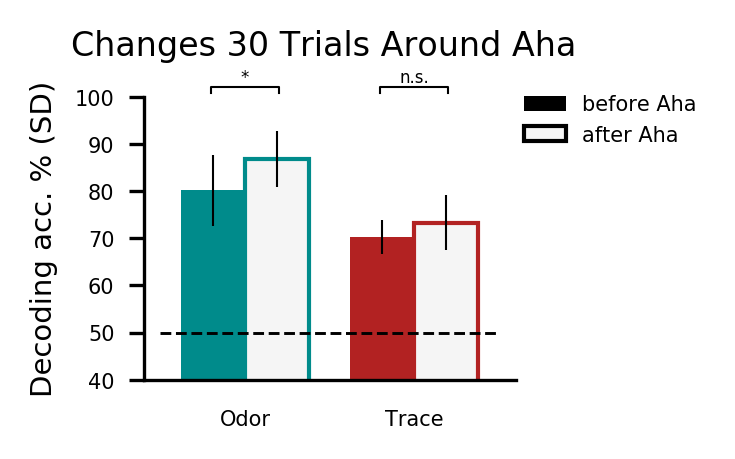

In [257]:
from matplotlib.patches import Patch
labels = ['Odor','Trace']
x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
#loops=10
v={}
d={}
to_plot = [1,2]

dark_co = ('forestgreen','darkcyan','firebrick','lightgrey','dimgrey','goldenrod')
fig, ax = pl.subplots(figsize=(1.6,1.25))
for c,i in zip(to_plot,range(2)):
    if c ==1:
        v = np.array(np.std(scores_tb_b_30_6)*100)
        ax.bar(i - width/2, np.mean(scores_tb_b_30_6)*100, width, color=dark_co[c],yerr=v)
        d = np.array(np.std(scores_tb_a_30_6)*100)
        ax.bar(i + width/2,  np.mean(scores_tb_a_30_6)*100, width,color='whitesmoke', edgecolor=dark_co[c],yerr=d)
    else:
        v = np.array(np.std(scores_tb_b_30_8)*100)
        ax.bar(i - width/2, np.mean(scores_tb_b_30_8)*100, width, color=dark_co[c],yerr=v)
        d = np.array(np.std(scores_tb_a_30_8)*100)
        ax.bar(i + width/2,  np.mean(scores_tb_a_30_8)*100, width,color='whitesmoke', edgecolor=dark_co[c],yerr=d)
ax.hlines(50,-.5,1.5, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Decoding acc. % (SD)')
#ax.set_title('Decoding During CS')
ax.set_ylim(40,100)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['before Aha','after Aha'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
pvs.append(add_significance(ax, scores_tb_b_30_6, scores_tb_a_30_6,-.2+0,0.2+0,102))
pvs.append(add_significance(ax, scores_tb_b_30_8, scores_tb_a_30_8,-.2+1,0.2+1,102))
        #max(np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Changes 30 Trials Around Aha',y=1.06,fontsize=8)

#fig.savefig('../final-ish figures/%s_gmin_bars_odor_PrPo_b.pdf'%NOTEBOOK_NAME)

In [227]:
scores_tb_b_30_6

array([[ 0.575,  0.68 ],
       [ 0.69 ,  0.91 ],
       [ 0.835,  0.585],
       [ 0.87 ,  0.905],
       [ 0.855,  0.73 ],
       [ 0.75 ,  0.77 ],
       [ 0.59 ,  0.68 ],
       [ 0.85 ,  0.845],
       [ 0.81 ,  0.87 ],
       [ 0.89 ,  0.625]])

In [228]:
scores_tb_a_30_6

array([[ 0.64 ,  0.735],
       [ 0.745,  0.945],
       [ 0.59 ,  0.65 ],
       [ 0.81 ,  0.78 ],
       [ 0.505,  0.945],
       [ 0.98 ,  0.72 ],
       [ 0.925,  0.695],
       [ 0.935,  0.715],
       [ 0.835,  0.775],
       [ 0.79 ,  0.615]])

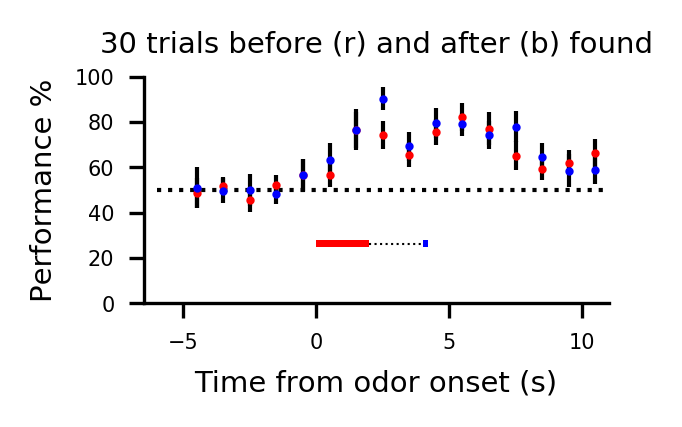

In [229]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_30_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_30_%s"%t))*100
    s = np.std(eval("scores_tb_b_30_%s"%t))*100 / np.sqrt(eval("scores_tb_b_30_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_30_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_30_%s"%t))*100
    s = np.std(eval("scores_tb_a_30_%s"%t))*100 / np.sqrt(eval("scores_tb_a_30_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('30 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
patterns_tb = {}
labels = {}
found = {}

for ani in d1_animals:

    exec("patterns_tb[ani] = ut.load_variable('patterns_tb','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    exec("labels[ani] = ut.load_variable('labels','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    exec("found[ani] = ut.load_variable('found_ind','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    
loop_opt = [10,20,30,]

founds = ['b','a']
#for loo in loo_opt:
    #for ani in animals:
for f in founds:
    for loo in loop_opt:
        for t in range(0,16):
            exec('patterns_tb_%s_%s_%s = {}'%(f,loo,t,))
            exec('labels_%s_%s = {}'%(f,loo,))
            for ani in d1_animals:
                try:
                    exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb['%s'][%s]"%(f,loo,t,ani,ani,t))
                    if f == 'b':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']-loo:found['%s']]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']-loo:found['%s']]"%(f,loo,ani,ani,ani,ani))
                    elif f == 'a':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']:loo+found['%s']]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']:loo+found['%s']]"%(f,loo,ani,ani,ani,ani))

                except IOError as error:
                    print error
                continue    



In [53]:
n_loops = 100
for t in range(16): # number of time bins
    for loo in loop_opt:
        for f in founds: 
            exec('scores_tb_%s_%s_%s = []'%(f,loo,t))
            print t,
            exec("p_str = patterns_tb_%s_%s_%s"%(f,loo,t,))
            exec("l_str = labels_%s_%s"%(f,loo,))
            eval("scores_tb_%s_%s_%s.append(np.r_[[do_test_within(p_str,l_str) for i in range(n_loops)]])"%(f,loo,t,)) 
            #[do_test_within(eval('patterns_tb_%s_%s_%s'%(f,loo,t)),eval('labels_%s_%s'%(f,loo))) for i in range(n_loops)]
            #            eval("scores_tb_%s_%s_%s"%(f,loo,t)) = 

0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 3 3 3 3 3 3 4 4 4 4 4 4 5 5 5 5 5 5 6 6 6 6 6 6 7 7 7 7 7 7 8 8 8 8 8 8 9 9 9 9 9 9 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12 12 13 13 13 13 13 13 14 14 14 14 14 14 15 15 15 15 15 15


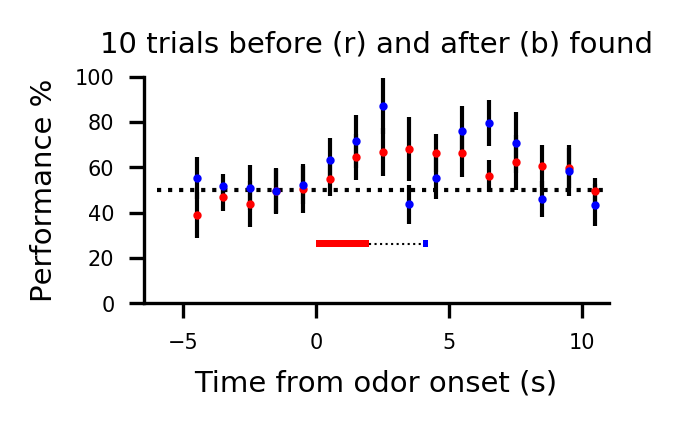

In [54]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_10_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_10_%s"%t))*100
    s = np.std(eval("scores_tb_b_10_%s"%t))*100 / np.sqrt(eval("scores_tb_b_10_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_10_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_10_%s"%t))*100
    s = np.std(eval("scores_tb_a_10_%s"%t))*100 / np.sqrt(eval("scores_tb_a_10_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('10 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

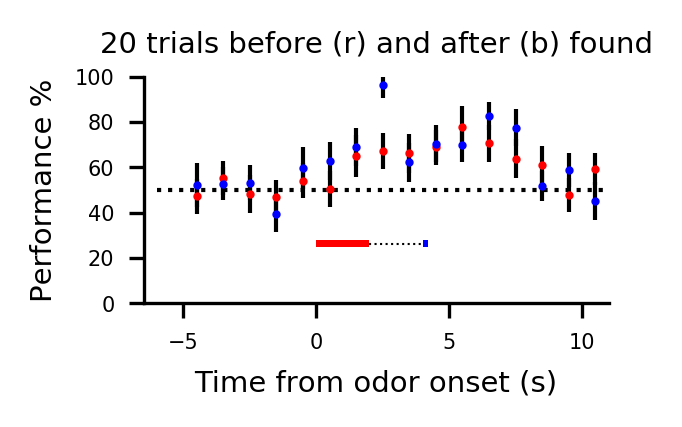

In [55]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_20_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_20_%s"%t))*100
    s = np.std(eval("scores_tb_b_20_%s"%t))*100 / np.sqrt(eval("scores_tb_b_20_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_20_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_20_%s"%t))*100
    s = np.std(eval("scores_tb_a_20_%s"%t))*100 / np.sqrt(eval("scores_tb_a_20_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('20 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

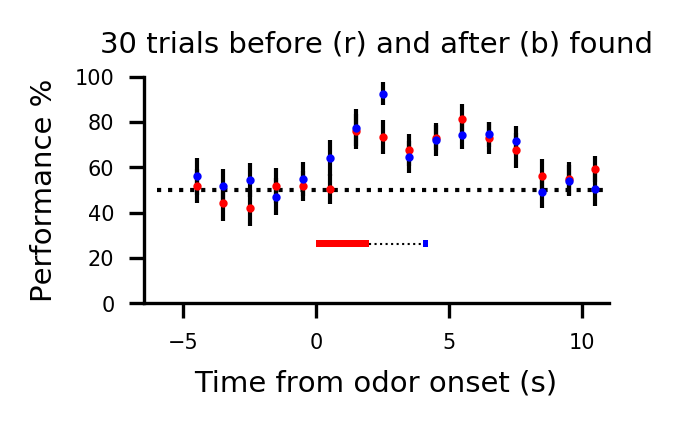

In [56]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_30_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_30_%s"%t))*100
    s = np.std(eval("scores_tb_b_30_%s"%t))*100 / np.sqrt(eval("scores_tb_b_30_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_30_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_30_%s"%t))*100
    s = np.std(eval("scores_tb_a_30_%s"%t))*100 / np.sqrt(eval("scores_tb_a_30_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('30 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [57]:
patterns_tb = {}
labels = {}
found = {}

for ani in d2_animals:

    exec("patterns_tb[ani] = ut.load_variable('patterns_tb','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    exec("labels[ani] = ut.load_variable('labels','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    exec("found[ani] = ut.load_variable('found_ind','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    
loop_opt = [10,20,30,]

founds = ['b','a']
#for loo in loo_opt:
    #for ani in animals:
for f in founds:
    for loo in loop_opt:
        for t in range(0,16):
            exec('patterns_tb_%s_%s_%s = {}'%(f,loo,t,))
            exec('labels_%s_%s = {}'%(f,loo,))
            for ani in d2_animals:
                try:
                    exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb['%s'][%s]"%(f,loo,t,ani,ani,t))
                    if f == 'b':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']-loo:found['%s']]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']-loo:found['%s']]"%(f,loo,ani,ani,ani,ani))
                    elif f == 'a':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']:loo+found['%s']]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']:loo+found['%s']]"%(f,loo,ani,ani,ani,ani))

                except IOError as error:
                    print error
                continue    



In [58]:
n_loops = 100
for t in range(16): # number of time bins
    for loo in loop_opt:
        for f in founds: 
            exec('scores_tb_%s_%s_%s = []'%(f,loo,t))
            print t,
            exec("p_str = patterns_tb_%s_%s_%s"%(f,loo,t,))
            exec("l_str = labels_%s_%s"%(f,loo,))
            eval("scores_tb_%s_%s_%s.append(np.r_[[do_test_within(p_str,l_str) for i in range(n_loops)]])"%(f,loo,t,)) 
            #[do_test_within(eval('patterns_tb_%s_%s_%s'%(f,loo,t)),eval('labels_%s_%s'%(f,loo))) for i in range(n_loops)]
            #            eval("scores_tb_%s_%s_%s"%(f,loo,t)) = 

0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 3 3 3 3 3 3 4 4 4 4 4 4 5 5 5 5 5 5 6 6 6 6 6 6 7 7 7 7 7 7 8 8 8 8 8 8 9 9 9 9 9 9 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12 12 13 13 13 13 13 13 14 14 14 14 14 14 15 15 15 15 15 15


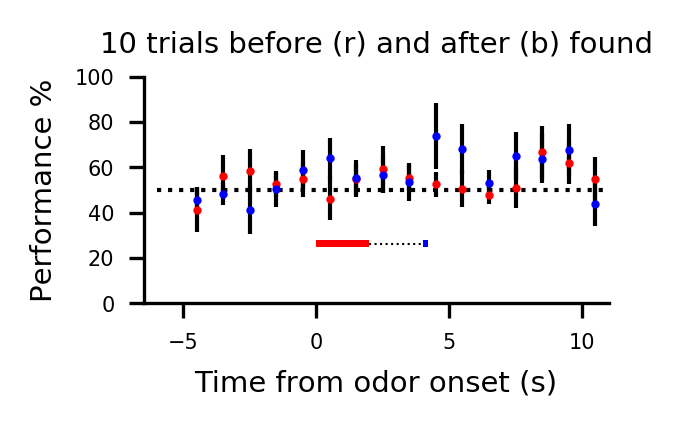

In [59]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_10_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_10_%s"%t))*100
    s = np.std(eval("scores_tb_b_10_%s"%t))*100 / np.sqrt(eval("scores_tb_b_10_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_10_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_10_%s"%t))*100
    s = np.std(eval("scores_tb_a_10_%s"%t))*100 / np.sqrt(eval("scores_tb_a_10_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('10 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

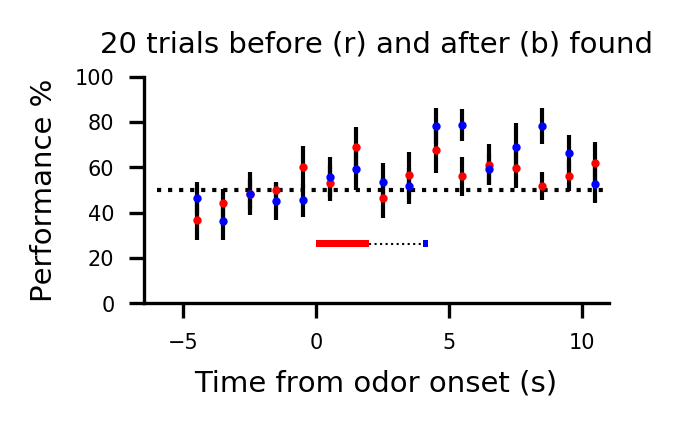

In [60]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_20_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_20_%s"%t))*100
    s = np.std(eval("scores_tb_b_20_%s"%t))*100 / np.sqrt(eval("scores_tb_b_20_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_20_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_20_%s"%t))*100
    s = np.std(eval("scores_tb_a_20_%s"%t))*100 / np.sqrt(eval("scores_tb_a_20_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('20 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

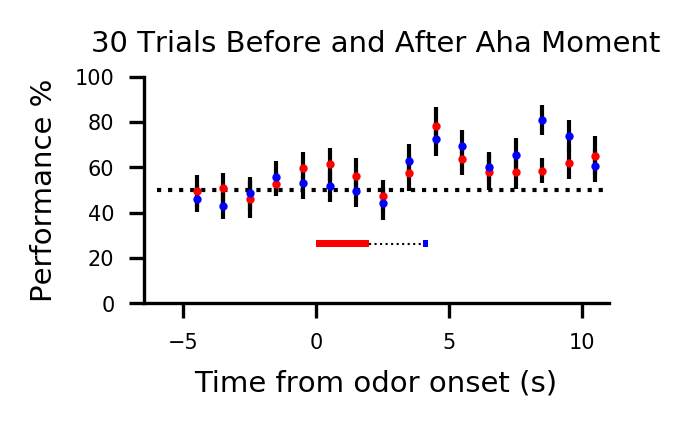

In [61]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_30_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_30_%s"%t))*100
    s = np.std(eval("scores_tb_b_30_%s"%t))*100 / np.sqrt(eval("scores_tb_b_30_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_30_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_30_%s"%t))*100
    s = np.std(eval("scores_tb_a_30_%s"%t))*100 / np.sqrt(eval("scores_tb_a_30_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('30 Trials Before and After Aha Moment')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [64]:
all_animals  = ('c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m3', 'c4m4', 'c10m8', '90', '91',)
d1_animals  = ('c3m2', 'c4m3', 'c4m4', 'c10m8', '90','91',)
d2_animals  = ('c3f3', 'c3f2', 'c3m1',)

patterns_tb = {}
labels = {}
found = {}

for ani in all_animals:

    exec("patterns_tb[ani] = ut.load_variable('patterns_tb','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    exec("labels[ani] = ut.load_variable('labels','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    exec("found[ani] = ut.load_variable('found_ind','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    
loop_opt = [10,20,30,]

founds = ['b','a']
#for loo in loo_opt:
    #for ani in animals:
for f in founds:
    for loo in loop_opt:
        for t in range(0,16):
            exec('patterns_tb_%s_%s_%s = {}'%(f,loo,t,))
            exec('labels_%s_%s = {}'%(f,loo,))
            for ani in d2_animals:
                try:
                    exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb['%s'][%s]"%(f,loo,t,ani,ani,t))
                    if f == 'b':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']-loo:found['%s']]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']-loo:found['%s']]"%(f,loo,ani,ani,ani,ani))
                    elif f == 'a':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']:loo+found['%s']]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']:loo+found['%s']]"%(f,loo,ani,ani,ani,ani))

                except IOError as error:
                    print error
                continue    




In [65]:
n_loops = 100
for t in range(16): # number of time bins
    for loo in loop_opt:
        for f in founds: 
            exec('v_scores_tb_%s_%s_%s = []'%(f,loo,t))
            print t,
            exec("p_str = patterns_tb_%s_%s_%s"%(f,loo,t,))
            exec("l_str = labels_%s_%s"%(f,loo,))
            eval("v_scores_tb_%s_%s_%s.append(np.r_[[do_test_within(p_str,l_str) for i in range(n_loops)]])"%(f,loo,t,)) 
            #[do_test_within(eval('patterns_tb_%s_%s_%s'%(f,loo,t)),eval('labels_%s_%s'%(f,loo))) for i in range(n_loops)]
            #            eval("scores_tb_%s_%s_%s"%(f,loo,t)) = 

0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 3 3 3 3 3 3 4 4 4 4 4 4 5 5 5 5 5 5 6 6 6 6 6 6 7 7 7 7 7 7 8 8 8 8 8 8 9 9 9 9 9 9 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12 12 13 13 13 13 13 13 14 14 14 14 14 14 15 15 15 15 15 15


In [66]:
all_animals = 'dhpcg1','dhpc24','dhpc35','dhpc36'
d1_animals  = ('dhpcg1','dhpc35')
d2_animals  = ('dhpc24','dhpc36')


patterns_tb = {}
labels = {}
found = {}

for ani in all_animals:

    exec("patterns_tb[ani] = ut.load_variable('patterns_tb','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    exec("labels[ani] = ut.load_variable('labels','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    exec("found[ani] = ut.load_variable('found_ind','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    
loop_opt = [10,20,30,]

founds = ['b','a']
#for loo in loo_opt:
    #for ani in animals:
for f in founds:
    for loo in loop_opt:
        for t in range(0,16):
            exec('patterns_tb_%s_%s_%s = {}'%(f,loo,t,))
            exec('labels_%s_%s = {}'%(f,loo,))
            for ani in d2_animals:
                try:
                    exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb['%s'][%s]"%(f,loo,t,ani,ani,t))
                    if f == 'b':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']-loo:found['%s']]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']-loo:found['%s']]"%(f,loo,ani,ani,ani,ani))
                    elif f == 'a':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']:loo+found['%s']]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']:loo+found['%s']]"%(f,loo,ani,ani,ani,ani))

                except IOError as error:
                    print error
                continue    

In [67]:
n_loops = 100
for t in range(16): # number of time bins
    for loo in loop_opt:
        for f in founds: 
            exec('d_scores_tb_%s_%s_%s = []'%(f,loo,t))
            print t,
            exec("p_str = patterns_tb_%s_%s_%s"%(f,loo,t,))
            exec("l_str = labels_%s_%s"%(f,loo,))
            eval("d_scores_tb_%s_%s_%s.append(np.r_[[do_test_within(p_str,l_str) for i in range(n_loops)]])"%(f,loo,t,)) 
            #[do_test_within(eval('patterns_tb_%s_%s_%s'%(f,loo,t)),eval('labels_%s_%s'%(f,loo))) for i in range(n_loops)]
            #            eval("scores_tb_%s_%s_%s"%(f,loo,t)) = 

0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 3 3 3 3 3 3 4 4 4 4 4 4 5 5 5 5 5 5 6 6 6 6 6 6 7 7 7 7 7 7 8 8 8 8 8 8 9 9 9 9 9 9 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12 12 13 13 13 13 13 13 14 14 14 14 14 14 15 15 15 15 15 15


In [68]:
np.mean(v_scores_tb_b_30_8)

0.60177499999999995

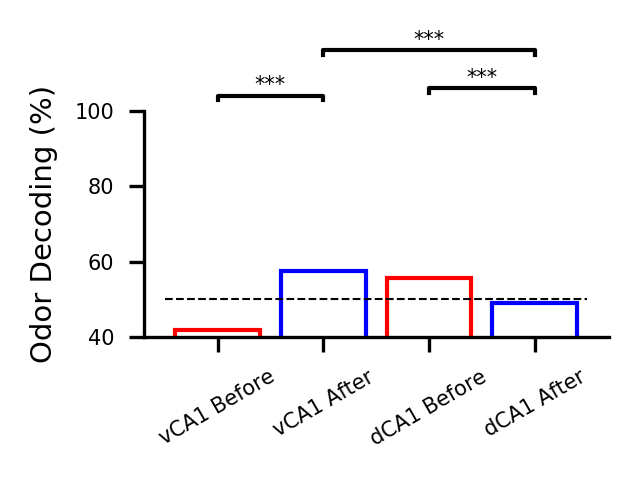

In [69]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))
values = [np.mean(v_scores_tb_b_30_6)*100, np.mean(v_scores_tb_a_30_6)*100, np.mean(d_scores_tb_b_30_6)*100, np.mean(d_scores_tb_a_30_6)*100]

pt.plot_bars(values, ax=ax, colors = ['r','b','r','b',])
ax.hlines(50, -0.5, 4-0.5, linestyles='dashed')

ax.set_xticks(range(4))
ax.set_xticklabels(['vCA1 Before','vCA1 After','dCA1 Before','dCA1 After'], rotation=30)
ax.set_ylabel('Odor Decoding (%)')
ax.set_ylim(40,100)
pvs = []
pvs.append(pt.add_significance(ax, v_scores_tb_b_30_8, v_scores_tb_a_30_8, 0, 1, 104)) #will compare sessions 'x' in values[x]
pvs.append(pt.add_significance(ax, d_scores_tb_b_30_8, d_scores_tb_a_30_8, 2, 3, 106))
pvs.append(pt.add_significance(ax, v_scores_tb_a_30_8, d_scores_tb_a_30_8, 1, 3, 116))


fig.savefig('../img/%s_tr_bars_dhpc.pdf'%NOTEBOOK_NAME)
np.savetxt('../img/%s_tr_bars_dhpc.pvs'%NOTEBOOK_NAME,  pvs, header='Mann-Whitney U two-sided')


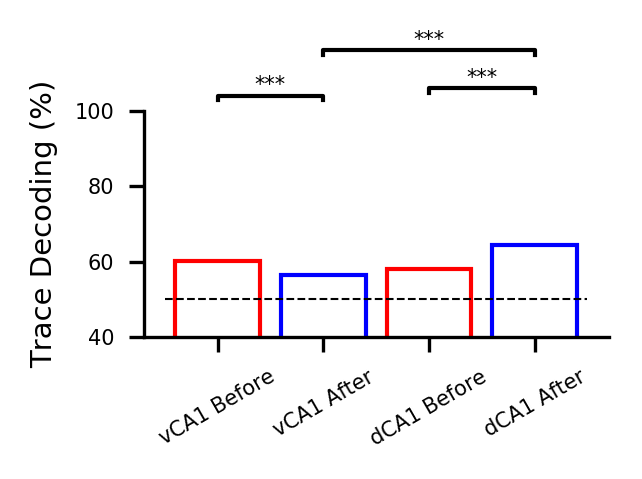

In [70]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))
values = [np.mean(v_scores_tb_b_30_8)*100, np.mean(v_scores_tb_a_30_8)*100, np.mean(d_scores_tb_b_30_8)*100, np.mean(d_scores_tb_a_30_8)*100]

pt.plot_bars(values, ax=ax, colors = ['r','b','r','b',])
ax.hlines(50, -0.5, 4-0.5, linestyles='dashed')

ax.set_xticks(range(4))
ax.set_xticklabels(['vCA1 Before','vCA1 After','dCA1 Before','dCA1 After'], rotation=30)
ax.set_ylabel('Trace Decoding (%)')
ax.set_ylim(40,100)
pvs = []
pvs.append(pt.add_significance(ax, v_scores_tb_b_30_8, v_scores_tb_a_30_8, 0, 1, 104)) #will compare sessions 'x' in values[x]
pvs.append(pt.add_significance(ax, d_scores_tb_b_30_8, d_scores_tb_a_30_8, 2, 3, 106))
pvs.append(pt.add_significance(ax, v_scores_tb_a_30_8, d_scores_tb_a_30_8, 1, 3, 116))


fig.savefig('../img/%s_tr_bars_dhpc.pdf'%NOTEBOOK_NAME)
np.savetxt('../img/%s_tr_bars_dhpc.pvs'%NOTEBOOK_NAME,  pvs, header='Mann-Whitney U two-sided')


NameError: name 'sessions' is not defined

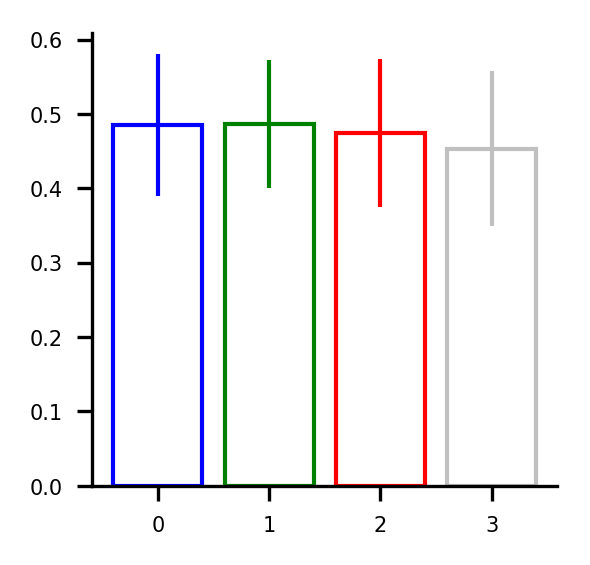

In [71]:
fig, ax = pl.subplots(1, 1, figsize=(2, 2))
values = [v_scores_tb_b_30_7*100, v_scores_tb_a_30_7*100, d_scores_tb_b_30_7*100, d_scores_tb_a_30_7*100]

pt.plot_bars(values, ax=ax, colors = ['b','g','r','silver','grey','y','k'])
ax.hlines(50, -0.5, len(sessions)-0.5, linestyles='dashed')

ax.set_xticks(range(6))
ax.set_xticklabels(sessions, rotation=30)
ax.set_ylabel('Trace decoding \ncombined FOV (%)')
ax.set_ylim(0,100)
pvs = []
pvs.append(pt.add_significance(ax, values[0], values[1], 0, 1, 104)) #will compare sessions 'x' in values[x]
#pvs.append(pt.add_significance(ax, values[1], values[2], 1, 2, 109))
#pvs.append(pt.add_significance(ax, values[2], values[3], 2, 3, 100))
pvs.append(pt.add_significance(ax, values[3], values[4], 3, 4, 106))
#pvs.append(pt.add_significance(ax, values[0], values[4], 0, 4, 120))


fig.savefig('../img/%s_tr_bars_dhpc.pdf'%NOTEBOOK_NAME)
np.savetxt('../img/%s_tr_bars_dhpc.pvs'%NOTEBOOK_NAME,  pvs, header='Mann-Whitney U two-sided')


fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_10_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_10_%s"%t))*100
    s = np.std(eval("scores_tb_b_10_%s"%t))*100 / np.sqrt(eval("scores_tb_b_10_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_10_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_10_%s"%t))*100
    s = np.std(eval("scores_tb_a_10_%s"%t))*100 / np.sqrt(eval("scores_tb_a_10_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('10 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
loop_opt = [10,20,30]

founds = ['b','a']
#for loo in loo_opt:
    #for ani in animals:
for f in founds:
    for loo in loop_opt:
        for t in range(0,16):
            exec('patterns_tb_%s_%s_%s = {}'%(f,loo,t,))
            exec('labels_%s_%s = {}'%(f,loo,))
            for ani in all_animals:
                try:
                    exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb['%s'][%s]"%(f,loo,t,ani,ani,t))
                    if f == 'b':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']-5-loo:found['%s']-5]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']-5-loo:found['%s']-5]"%(f,loo,ani,ani,ani,ani))
                    elif f == 'a':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']-5:loo+found['%s']-5]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']-5:loo+found['%s']-5]"%(f,loo,ani,ani,ani,ani))

                except IOError as error:
                    print error
                continue    



In [ ]:
found

In [ ]:
n_loops = 100
for t in range(16): # number of time bins
    for loo in loop_opt:
        for f in founds: 
            exec('scores_tb_%s_%s_%s = []'%(f,loo,t))
            print t,
            exec("p_str = patterns_tb_%s_%s_%s"%(f,loo,t,))
            exec("l_str = labels_%s_%s"%(f,loo,))
            eval("scores_tb_%s_%s_%s.append(np.r_[[do_test_within(p_str,l_str) for i in range(n_loops)]])"%(f,loo,t,)) 
            #[do_test_within(eval('patterns_tb_%s_%s_%s'%(f,loo,t)),eval('labels_%s_%s'%(f,loo))) for i in range(n_loops)]
            #            eval("scores_tb_%s_%s_%s"%(f,loo,t)) = 

In [ ]:
np.mean(scores_tb_b_10_0[0])


In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_10_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_10_%s"%t))*100
    s = np.std(eval("scores_tb_b_10_%s"%t))*100 / np.sqrt(eval("scores_tb_b_10_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_10_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_10_%s"%t))*100
    s = np.std(eval("scores_tb_a_10_%s"%t))*100 / np.sqrt(eval("scores_tb_a_10_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('10 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_20_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_20_%s"%t))*100
    s = np.std(eval("scores_tb_b_20_%s"%t))*100 / np.sqrt(eval("scores_tb_b_20_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_20_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_20_%s"%t))*100
    s = np.std(eval("scores_tb_a_20_%s"%t))*100 / np.sqrt(eval("scores_tb_a_20_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('20 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_30_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_30_%s"%t))*100
    s = np.std(eval("scores_tb_b_30_%s"%t))*100 / np.sqrt(eval("scores_tb_b_30_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_30_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_30_%s"%t))*100
    s = np.std(eval("scores_tb_a_30_%s"%t))*100 / np.sqrt(eval("scores_tb_a_30_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('30 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
loop_opt = [10,20,30,]

shift = 10

founds = ['b','a']
#for loo in loo_opt:
    #for ani in animals:
for f in founds:
    for loo in loop_opt:
        for t in range(0,16):
            exec('patterns_tb_%s_%s_%s = {}'%(f,loo,t,))
            exec('labels_%s_%s = {}'%(f,loo,))
            for ani in all_animals:
                try:
                    exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb['%s'][%s]"%(f,loo,t,ani,ani,t))
                    if f == 'b':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']-shift-loo:found['%s']-shift]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']-shift-loo:found['%s']-shift]"%(f,loo,ani,ani,ani,ani))
                    elif f == 'a':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']+shift:loo+found['%s']+shift]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']+shift:loo+found['%s']+shift]"%(f,loo,ani,ani,ani,ani))

                except IOError as error:
                    print error
                continue    



In [ ]:
n_loops = 100
for t in range(16): # number of time bins
    for loo in loop_opt:
        for f in founds: 
            exec('scores_tb_%s_%s_%s = []'%(f,loo,t))
            print t,
            exec("p_str = patterns_tb_%s_%s_%s"%(f,loo,t,))
            exec("l_str = labels_%s_%s"%(f,loo,))
            eval("scores_tb_%s_%s_%s.append(np.r_[[do_test_within(p_str,l_str) for i in range(n_loops)]])"%(f,loo,t,)) 
            #[do_test_within(eval('patterns_tb_%s_%s_%s'%(f,loo,t)),eval('labels_%s_%s'%(f,loo))) for i in range(n_loops)]
            #            eval("scores_tb_%s_%s_%s"%(f,loo,t)) = 

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_10_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_10_%s"%t))*100
    s = np.std(eval("scores_tb_b_10_%s"%t))*100 / np.sqrt(eval("scores_tb_b_10_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_10_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_10_%s"%t))*100
    s = np.std(eval("scores_tb_a_10_%s"%t))*100 / np.sqrt(eval("scores_tb_a_10_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('10 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_20_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_20_%s"%t))*100
    s = np.std(eval("scores_tb_b_20_%s"%t))*100 / np.sqrt(eval("scores_tb_b_20_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_20_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_20_%s"%t))*100
    s = np.std(eval("scores_tb_a_20_%s"%t))*100 / np.sqrt(eval("scores_tb_a_20_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('20 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_30_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_30_%s"%t))*100
    s = np.std(eval("scores_tb_b_30_%s"%t))*100 / np.sqrt(eval("scores_tb_b_30_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_30_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_30_%s"%t))*100
    s = np.std(eval("scores_tb_a_30_%s"%t))*100 / np.sqrt(eval("scores_tb_a_30_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('30 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
all_animals  = ('c3m2', 'c4m3', 'c10m8', '90', '91',)
d1_animals  = ('c3m2', 'c4m3', 'c10m8', '90','91')

# do day 1 and day 2 but ignore mice that are cut off
# in OFC could decode CS right before AHA

#compare decoding odor and trace, 

#vijay cross time bin decoders, selectivity isn't as striking

#should include catch trials when discussing expect outcome




In [ ]:
loop_opt = [10,20,30,40]

founds = ['b','a']
#for loo in loo_opt:
    #for ani in animals:
for f in founds:
    for loo in loop_opt:
        for t in range(0,16):
            exec('patterns_tb_%s_%s_%s = {}'%(f,loo,t,))
            exec('labels_%s_%s = {}'%(f,loo,))
            for ani in all_animals:
                try:
                    exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb['%s'][%s]"%(f,loo,t,ani,ani,t))
                    if f == 'b':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']-loo:found['%s']]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']-loo:found['%s']]"%(f,loo,ani,ani,ani,ani))
                    elif f == 'a':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']:loo+found['%s']]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']:loo+found['%s']]"%(f,loo,ani,ani,ani,ani))

                except IOError as error:
                    print error
                continue    



In [ ]:
n_loops = 100
for t in range(16): # number of time bins
    for loo in loop_opt:
        for f in founds: 
            exec('scores_tb_%s_%s_%s = []'%(f,loo,t))
            print t,
            exec("p_str = patterns_tb_%s_%s_%s"%(f,loo,t,))
            exec("l_str = labels_%s_%s"%(f,loo,))
            eval("scores_tb_%s_%s_%s.append(np.r_[[do_test_within(p_str,l_str) for i in range(n_loops)]])"%(f,loo,t,)) 
            #[do_test_within(eval('patterns_tb_%s_%s_%s'%(f,loo,t)),eval('labels_%s_%s'%(f,loo))) for i in range(n_loops)]
            #            eval("scores_tb_%s_%s_%s"%(f,loo,t)) = 

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_10_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_10_%s"%t))*100
    s = np.std(eval("scores_tb_b_10_%s"%t))*100 / np.sqrt(eval("scores_tb_b_10_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_10_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_10_%s"%t))*100
    s = np.std(eval("scores_tb_a_10_%s"%t))*100 / np.sqrt(eval("scores_tb_a_10_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('10 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_20_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_20_%s"%t))*100
    s = np.std(eval("scores_tb_b_20_%s"%t))*100 / np.sqrt(eval("scores_tb_b_20_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_20_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_20_%s"%t))*100
    s = np.std(eval("scores_tb_a_20_%s"%t))*100 / np.sqrt(eval("scores_tb_a_20_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('20 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_30_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_30_%s"%t))*100
    s = np.std(eval("scores_tb_b_30_%s"%t))*100 / np.sqrt(eval("scores_tb_b_30_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_30_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_30_%s"%t))*100
    s = np.std(eval("scores_tb_a_30_%s"%t))*100 / np.sqrt(eval("scores_tb_a_30_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('30 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_40_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_40_%s"%t))*100
    s = np.std(eval("scores_tb_b_40_%s"%t))*100 / np.sqrt(eval("scores_tb_b_40_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_40_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_40_%s"%t))*100
    s = np.std(eval("scores_tb_a_40_%s"%t))*100 / np.sqrt(eval("scores_tb_a_40_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('40 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
loop_opt = [10,20,30,40]

shift = 5
ex_shift = 10

founds = ['b','a']
#for loo in loo_opt:
    #for ani in animals:
for f in founds:
    for loo in loop_opt:
        for t in range(0,16):
            exec('patterns_tb_%s_%s_%s = {}'%(f,loo,t,))
            exec('labels_%s_%s = {}'%(f,loo,))
            for ani in all_animals:
                try:
                    exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb['%s'][%s]"%(f,loo,t,ani,ani,t))
                    if f == 'b':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']-ex_shift-loo-shift:found['%s']-ex_shift-shift]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']-ex_shift-loo-shift:found['%s']-ex_shift-shift]"%(f,loo,ani,ani,ani,ani))
                    elif f == 'a':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']+ex_shift-shift:loo+found['%s']+ex_shift-shift]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']+ex_shift-shift:loo+found['%s']+ex_shift-shift]"%(f,loo,ani,ani,ani,ani))

                except IOError as error:
                    print error
                continue    



In [ ]:
n_loops = 100
for t in range(16): # number of time bins
    for loo in loop_opt:
        for f in founds: 
            exec('scores_tb_%s_%s_%s = []'%(f,loo,t))
            print t,
            exec("p_str = patterns_tb_%s_%s_%s"%(f,loo,t,))
            exec("l_str = labels_%s_%s"%(f,loo,))
            eval("scores_tb_%s_%s_%s.append(np.r_[[do_test_within(p_str,l_str) for i in range(n_loops)]])"%(f,loo,t,)) 
            #[do_test_within(eval('patterns_tb_%s_%s_%s'%(f,loo,t)),eval('labels_%s_%s'%(f,loo))) for i in range(n_loops)]
            #            eval("scores_tb_%s_%s_%s"%(f,loo,t)) = 

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_10_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_10_%s"%t))*100
    s = np.std(eval("scores_tb_b_10_%s"%t))*100 / np.sqrt(eval("scores_tb_b_10_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_10_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_10_%s"%t))*100
    s = np.std(eval("scores_tb_a_10_%s"%t))*100 / np.sqrt(eval("scores_tb_a_10_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('10 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_20_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_20_%s"%t))*100
    s = np.std(eval("scores_tb_b_20_%s"%t))*100 / np.sqrt(eval("scores_tb_b_20_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_20_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_20_%s"%t))*100
    s = np.std(eval("scores_tb_a_20_%s"%t))*100 / np.sqrt(eval("scores_tb_a_20_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('20 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_30_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_30_%s"%t))*100
    s = np.std(eval("scores_tb_b_30_%s"%t))*100 / np.sqrt(eval("scores_tb_b_30_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_30_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_30_%s"%t))*100
    s = np.std(eval("scores_tb_a_30_%s"%t))*100 / np.sqrt(eval("scores_tb_a_30_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('30 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_40_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_40_%s"%t))*100
    s = np.std(eval("scores_tb_b_40_%s"%t))*100 / np.sqrt(eval("scores_tb_b_40_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_40_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_40_%s"%t))*100
    s = np.std(eval("scores_tb_a_40_%s"%t))*100 / np.sqrt(eval("scores_tb_a_40_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('40 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
found

In [ ]:
found = {'90': 70, '91': 55, 'c3m2': 60, 'c4m3': 55, 'c4m4': 40, 'c10m8': 57, }
#max’s found: c3m2 (~60), c3f2 (128), c3f3 (132), c3m1 (130),  c4m3(22 or 122), c4m4(38), c10m8(57), 90(70), 91(55), 92(170)


In [ ]:
all_animals = ('c3m2', 'c4m3', 'c4m4', 'c10m8', '90', '91',)

In [ ]:
loop_opt = [10,20,30,40]

founds = ['b','a']
#for loo in loo_opt:
    #for ani in animals:
for f in founds:
    for loo in loop_opt:
        for t in range(0,16):
            exec('patterns_tb_%s_%s_%s = {}'%(f,loo,t,))
            exec('labels_%s_%s = {}'%(f,loo,))
            for ani in all_animals:
                try:
                    exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb['%s'][%s]"%(f,loo,t,ani,ani,t))
                    if f == 'b':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']-loo:found['%s']]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']-loo:found['%s']]"%(f,loo,ani,ani,ani,ani))
                    elif f == 'a':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']:loo+found['%s']]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']:loo+found['%s']]"%(f,loo,ani,ani,ani,ani))

                except IOError as error:
                    print error
                continue    



In [ ]:
n_loops = 100
for t in range(16): # number of time bins
    for loo in loop_opt:
        for f in founds: 
            exec('scores_tb_%s_%s_%s = []'%(f,loo,t))
            print t,
            exec("p_str = patterns_tb_%s_%s_%s"%(f,loo,t,))
            exec("l_str = labels_%s_%s"%(f,loo,))
            eval("scores_tb_%s_%s_%s.append(np.r_[[do_test_within(p_str,l_str) for i in range(n_loops)]])"%(f,loo,t,)) 
            #[do_test_within(eval('patterns_tb_%s_%s_%s'%(f,loo,t)),eval('labels_%s_%s'%(f,loo))) for i in range(n_loops)]
            #            eval("scores_tb_%s_%s_%s"%(f,loo,t)) = 

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_10_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_10_%s"%t))*100
    s = np.std(eval("scores_tb_b_10_%s"%t))*100 / np.sqrt(eval("scores_tb_b_10_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_10_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_10_%s"%t))*100
    s = np.std(eval("scores_tb_a_10_%s"%t))*100 / np.sqrt(eval("scores_tb_a_10_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('10 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_20_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_20_%s"%t))*100
    s = np.std(eval("scores_tb_b_20_%s"%t))*100 / np.sqrt(eval("scores_tb_b_20_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_20_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_20_%s"%t))*100
    s = np.std(eval("scores_tb_a_20_%s"%t))*100 / np.sqrt(eval("scores_tb_a_20_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('20 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_30_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_30_%s"%t))*100
    s = np.std(eval("scores_tb_b_30_%s"%t))*100 / np.sqrt(eval("scores_tb_b_30_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_30_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_30_%s"%t))*100
    s = np.std(eval("scores_tb_a_30_%s"%t))*100 / np.sqrt(eval("scores_tb_a_30_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('30 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_40_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_40_%s"%t))*100
    s = np.std(eval("scores_tb_b_40_%s"%t))*100 / np.sqrt(eval("scores_tb_b_40_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_40_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_40_%s"%t))*100
    s = np.std(eval("scores_tb_a_40_%s"%t))*100 / np.sqrt(eval("scores_tb_a_40_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('40 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
all_animals = ('c3m2', 'c4m3', 'c10m8', '90', '91',)

In [ ]:
loop_opt = [10,20,30,40]

shift = 5
ex_shift = 10

founds = ['b','a']
#for loo in loo_opt:
    #for ani in animals:
for f in founds:
    for loo in loop_opt:
        for t in range(0,16):
            exec('patterns_tb_%s_%s_%s = {}'%(f,loo,t,))
            exec('labels_%s_%s = {}'%(f,loo,))
            for ani in all_animals:
                try:
                    exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb['%s'][%s]"%(f,loo,t,ani,ani,t))
                    if f == 'b':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']-ex_shift-loo-shift:found['%s']-ex_shift-shift]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']-ex_shift-loo-shift:found['%s']-ex_shift-shift]"%(f,loo,ani,ani,ani,ani))
                    elif f == 'a':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']+ex_shift-shift:loo+found['%s']+ex_shift-shift]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']+ex_shift-shift:loo+found['%s']+ex_shift-shift]"%(f,loo,ani,ani,ani,ani))

                except IOError as error:
                    print error
                continue    



In [ ]:
n_loops = 100
for t in range(16): # number of time bins
    for loo in loop_opt:
        for f in founds: 
            exec('scores_tb_%s_%s_%s = []'%(f,loo,t))
            print t,
            exec("p_str = patterns_tb_%s_%s_%s"%(f,loo,t,))
            exec("l_str = labels_%s_%s"%(f,loo,))
            eval("scores_tb_%s_%s_%s.append(np.r_[[do_test_within(p_str,l_str) for i in range(n_loops)]])"%(f,loo,t,)) 
            #[do_test_within(eval('patterns_tb_%s_%s_%s'%(f,loo,t)),eval('labels_%s_%s'%(f,loo))) for i in range(n_loops)]
            #            eval("scores_tb_%s_%s_%s"%(f,loo,t)) = 

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_10_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_10_%s"%t))*100
    s = np.std(eval("scores_tb_b_10_%s"%t))*100 / np.sqrt(eval("scores_tb_b_10_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_10_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_10_%s"%t))*100
    s = np.std(eval("scores_tb_a_10_%s"%t))*100 / np.sqrt(eval("scores_tb_a_10_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('10 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_20_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_20_%s"%t))*100
    s = np.std(eval("scores_tb_b_20_%s"%t))*100 / np.sqrt(eval("scores_tb_b_20_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_20_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_20_%s"%t))*100
    s = np.std(eval("scores_tb_a_20_%s"%t))*100 / np.sqrt(eval("scores_tb_a_20_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('20 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_30_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_30_%s"%t))*100
    s = np.std(eval("scores_tb_b_30_%s"%t))*100 / np.sqrt(eval("scores_tb_b_30_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_30_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_30_%s"%t))*100
    s = np.std(eval("scores_tb_a_30_%s"%t))*100 / np.sqrt(eval("scores_tb_a_30_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('30 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_40_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_40_%s"%t))*100
    s = np.std(eval("scores_tb_b_40_%s"%t))*100 / np.sqrt(eval("scores_tb_b_40_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_40_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_40_%s"%t))*100
    s = np.std(eval("scores_tb_a_40_%s"%t))*100 / np.sqrt(eval("scores_tb_a_40_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('40 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

# This is aha divided by 2


In [92]:
found

{'dhpc24': 206, 'dhpc35': 63, 'dhpc36': 129, 'dhpcg1': 73}

In [91]:
patterns_tb = {}
labels = {}
found = {}

for ani in all_animals:

    exec("patterns_tb[ani] = ut.load_variable('patterns_tb','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    exec("labels[ani] = ut.load_variable('labels','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    exec("found[ani] = ut.load_variable('found_ind','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    
loop_opt = [10,20,30,]

founds = ['b','a']
#for loo in loo_opt:
    #for ani in animals:
for f in founds:
    for loo in loop_opt:
        for t in range(0,16):
            exec('patterns_tb_%s_%s_%s = {}'%(f,loo,t,))
            exec('labels_%s_%s = {}'%(f,loo,))
            for ani in all_animals:
                try:
                    exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb['%s'][%s]"%(f,loo,t,ani,ani,t))
                    if f == 'b':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']-loo:found['%s']]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']-loo:found['%s']]"%(f,loo,ani,ani,ani,ani))
                    elif f == 'a':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']:loo+found['%s']]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']:loo+found['%s']]"%(f,loo,ani,ani,ani,ani))

                except IOError as error:
                    print error
                continue    



In [ ]:
n_loops = 100
for t in range(16): # number of time bins
    for loo in loop_opt:
        for f in founds: 
            exec('scores_tb_%s_%s_%s = []'%(f,loo,t))
            print t,
            exec("p_str = patterns_tb_%s_%s_%s"%(f,loo,t,))
            exec("l_str = labels_%s_%s"%(f,loo,))
            eval("scores_tb_%s_%s_%s.append(np.r_[[do_test_within(p_str,l_str) for i in range(n_loops)]])"%(f,loo,t,)) 
            #[do_test_within(eval('patterns_tb_%s_%s_%s'%(f,loo,t)),eval('labels_%s_%s'%(f,loo))) for i in range(n_loops)]
            #            eval("scores_tb_%s_%s_%s"%(f,loo,t)) = 

In [113]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [114]:
found

{'dhpc24': 206, 'dhpc35': 63, 'dhpc36': 129, 'dhpcg1': 73}

In [127]:
vals_step = range(40)
vals_step
vals_step.reverse()
for i in range(21):
    if i>0:
        vals_step.append(i)
print vals_step

[39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [128]:
patterns_tb = {}
labels = {}
found = {}

for ani in all_animals:

    exec("patterns_tb[ani] = ut.load_variable('patterns_tb','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    exec("labels[ani] = ut.load_variable('labels','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    exec("found[ani] = ut.load_variable('found_ind','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    
loop_opt = [20]

#okay so I have found points and want to look in 20 trial bins starting 20 trials before

for i in range(len(found)):
    found[found.keys()[i]] = 40

founds = ['b','a']
#for loo in loo_opt:
    #for ani in animals:
step_int = 0
for loo in loop_opt:
    for step in vals_step:
        step_int = step_int + 1
        for t in [6,8]:
            exec('patterns_tb_%s_%s_%s = {}'%(loo,t,step_int))
            exec('labels_%s_%s = {}'%(loo,step_int))
            for ani in all_animals:
                if step_int<=40:
                    try:
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb['%s'][%s]"%(loo,t,step_int,ani,ani,t))
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']-step:found['%s']-step+loo]"%(loo,t,step_int,ani,loo,t,step_int,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']-step:found['%s']-step+loo]"%(loo,step_int,ani,ani,ani,ani))

                    except IOError as error:
                        print error
                    continue    

                elif step_int>40:
                    try:
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb['%s'][%s]"%(loo,t,step_int,ani,ani,t))
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']+step:found['%s']+step+loo]"%(loo,t,step_int,ani,loo,t,step_int,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']+step:found['%s']+step+loo]"%(loo,step_int,ani,ani,ani,ani))

                    except IOError as error:
                        print error
                    continue    



In [129]:
n_loops = 10
step_int=0
for step in vals_step:
    step_int = step_int + 1
    for t in [6,8]: # number of time bins
        for loo in loop_opt:
            exec('scores_tb_%s_%s_%s = []'%(loo,t,step_int))
            print step,
            exec("p_str = patterns_tb_%s_%s_%s"%(loo,t,step_int))
            exec("l_str = labels_%s_%s"%(loo,step_int))
            eval("scores_tb_%s_%s_%s.append(np.r_[[do_test_within(p_str,l_str) for i in range(n_loops)]])"%(loo,t,step_int)) 
            #[do_test_within(eval('patterns_tb_%s_%s_%s'%(f,loo,t)),eval('labels_%s_%s'%(f,loo))) for i in range(n_loops)]
            #            eval("scores_tb_%s_%s_%s"%(f,loo,t)) = 


39 39 38 38 37 37 36 36 35 35 34 34 33 33 32 32 31 31 30 30 29 29 28 28 27 27 26 26 25 25 24 24 23 23 22 22 21 21 20 20 19 19 18 18 17 17 16 16 15 15 14 14 13 13 12 12 11 11 10 10 9 9 8 8 7 7 6 6 5 5 4 4 3 3 2 2 1 1 0 0 1 1 2 2 3 3 4 4 5 5 6 6 7 7 8 8 9 9 10 10 11 11 12 12 13 13 14 14 15 15 16 16 17 17 18 18 19 19 20 20


In [130]:
steps_list = []

for i in range(len(vals_step)):
    steps_list.append(i+1)

In [131]:
ste_list = []
t_arr = []
for i in range(40):
    t_arr.append(i)
t_arr.reverse()
for i in range(40):
    t_arr[i] = t_arr[i]*-1
for i in range(40):
    ste_list.append(t_arr[i])
for i in range(len(vals_step)-40):
    ste_list.append(i)

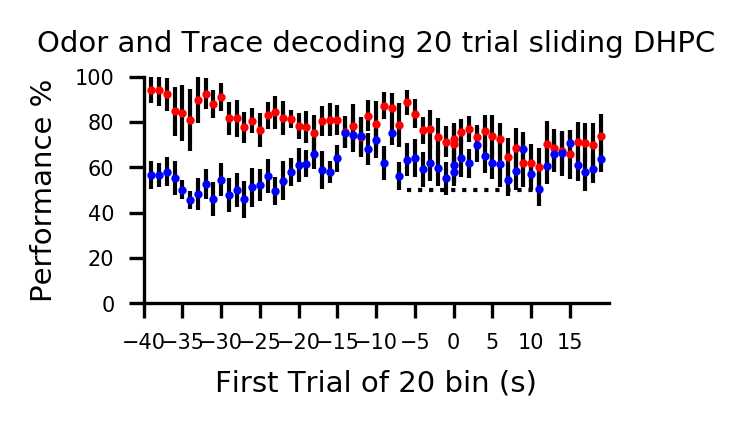

In [132]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
count = 0
for step_int in steps_list:
    ax.plot(ste_list[count], np.mean(eval("scores_tb_20_6_%s"%step_int))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_20_6_%s"%step_int))*100
    s = np.std(eval("scores_tb_20_6_%s"%step_int))*100 / np.sqrt(eval("scores_tb_20_6_%s"%step_int)[0].shape[-1])
    ax.errorbar(ste_list[count], m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(ste_list[count], np.mean(eval("scores_tb_20_8_%s"%step_int))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_20_8_%s"%step_int))*100
    s = np.std(eval("scores_tb_20_8_%s"%step_int))*100 / np.sqrt(eval("scores_tb_20_8_%s"%step_int)[0].shape[-1])
    ax.errorbar(ste_list[count], m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    count = count + 1
ax.set_ylim(0, 100)
ax.set_xlim(-40, len(vals_step)-40)
ax.set_xticks(np.arange(-40,len(vals_step)-40, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('First Trial of 20 bin (s)')
ax.set_ylabel('Performance %')
ax.set_title('Odor and Trace decoding 20 trial sliding DHPC')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [261]:
patterns_tb = {}
labels = {}
found = {}

for ani in all_animals:

    exec("patterns_tb[ani] = ut.load_variable('patterns_tb','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    exec("labels[ani] = ut.load_variable('labels','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    exec("found[ani] = ut.load_variable('found_ind','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    
loop_opt = [30]

#okay so I have found points and want to look in 20 trial bins starting 20 trials before

for i in range(len(found)):
    found[found.keys()[i]] = 40

founds = ['b','a']
#for loo in loo_opt:
    #for ani in animals:
step_int = 0
for loo in loop_opt:
    for step in vals_step:
        step_int = step_int + 1
        for t in [6,8]:
            exec('patterns_tb_%s_%s_%s = {}'%(loo,t,step_int))
            exec('labels_%s_%s = {}'%(loo,step_int))
            for ani in all_animals:
                if step_int<=40:
                    try:
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb['%s'][%s]"%(loo,t,step_int,ani,ani,t))
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']-step:found['%s']-step+loo]"%(loo,t,step_int,ani,loo,t,step_int,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']-step:found['%s']-step+loo]"%(loo,step_int,ani,ani,ani,ani))

                    except IOError as error:
                        print error
                    continue    

                elif step_int>40:
                    try:
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb['%s'][%s]"%(loo,t,step_int,ani,ani,t))
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']+step:found['%s']+step+loo]"%(loo,t,step_int,ani,loo,t,step_int,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']+step:found['%s']+step+loo]"%(loo,step_int,ani,ani,ani,ani))

                    except IOError as error:
                        print error
                    continue    



In [262]:
n_loops = 10
step_int=0
for step in vals_step:
    step_int = step_int + 1
    for t in [6,8]: # number of time bins
        for loo in loop_opt:
            exec('scores_tb_%s_%s_%s = []'%(loo,t,step_int))
            print step,
            exec("p_str = patterns_tb_%s_%s_%s"%(loo,t,step_int))
            exec("l_str = labels_%s_%s"%(loo,step_int))
            exec("scores_tb_%s_%s_%s = np.r_[[do_test_within(p_str,l_str) for i in range(n_loops)]]"%(loo,t,step_int))
            exec("scores_tb_%s_%s_%s = np.mean(scores_tb_%s_%s_%s,1)"%(loo,t,step_int,loo,t,step_int))
            #[do_test_within(eval('patterns_tb_%s_%s_%s'%(f,loo,t)),eval('labels_%s_%s'%(f,loo))) for i in range(n_loops)]
            #            eval("scores_tb_%s_%s_%s"%(f,loo,t)) = 


39 39 38 38 37 37 36 36 35 35 34 34 33 33 32 32 31 31 30 30 29 29 28 28 27 27 26 26 25 25 24 24 23 23 22 22 21 21 20 20 19 19 18 18 17 17 16 16 15 15 14 14 13 13 12 12 11 11 10 10 9 9 8 8 7 7 6 6 5 5 4 4 3 3 2 2 1 1 0 0 1 1 2 2 3 3 4 4 5 5 6 6 7 7 8 8 9 9 10 10 11 11 12 12 13 13 14 14 15 15 16 16 17 17 18 18 19 19 20 20


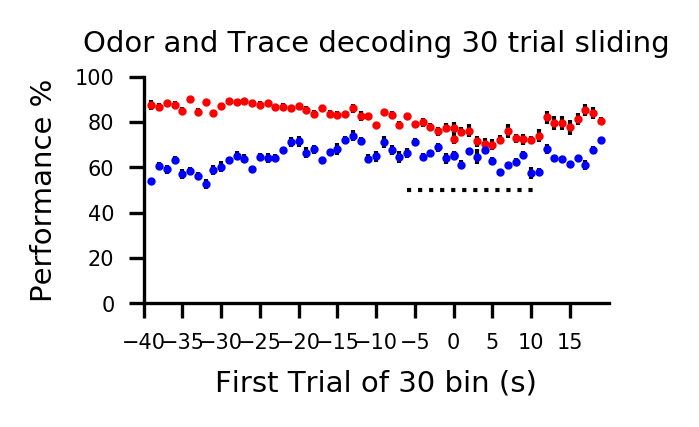

In [264]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
count = 0
for step_int in steps_list:
    ax.plot(ste_list[count], np.mean(eval("scores_tb_30_6_%s"%step_int))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_30_6_%s"%step_int))*100
    s = np.std(eval("scores_tb_30_6_%s"%step_int))*100 / np.sqrt(eval("scores_tb_30_6_%s"%step_int).shape[-1])
    ax.errorbar(ste_list[count], m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(ste_list[count], np.mean(eval("scores_tb_30_8_%s"%step_int))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_30_8_%s"%step_int))*100
    s = np.std(eval("scores_tb_30_8_%s"%step_int))*100 / np.sqrt(eval("scores_tb_30_8_%s"%step_int).shape[-1])
    ax.errorbar(ste_list[count], m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    count = count + 1
ax.set_ylim(0, 100)
ax.set_xlim(-40, len(vals_step)-40)
ax.set_xticks(np.arange(-40,len(vals_step)-40, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('First Trial of 30 bin (s)')
ax.set_ylabel('Performance %')
ax.set_title('Odor and Trace decoding 30 trial sliding')



# fig.savefig('img/proposal_decoding_timebased.svg')

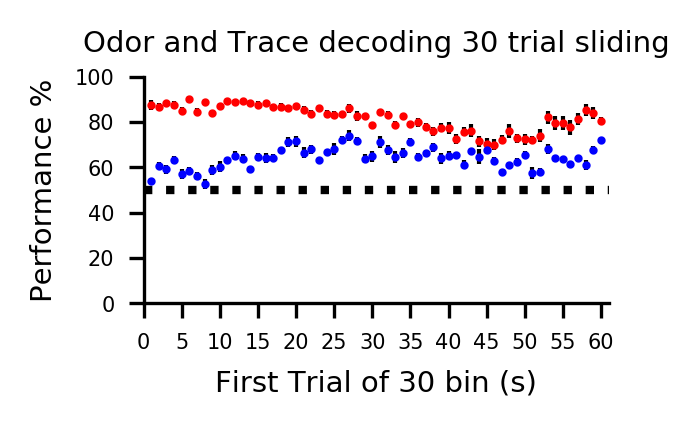

In [265]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
count = 0
for step_int in steps_list:
    ax.plot(step_int, np.mean(eval("scores_tb_30_6_%s"%step_int))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_30_6_%s"%step_int))*100
    s = np.std(eval("scores_tb_30_6_%s"%step_int))*100 / np.sqrt(eval("scores_tb_30_6_%s"%step_int).shape[-1])
    ax.errorbar(step_int, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(step_int, np.mean(eval("scores_tb_30_8_%s"%step_int))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_30_8_%s"%step_int))*100
    s = np.std(eval("scores_tb_30_8_%s"%step_int))*100 / np.sqrt(eval("scores_tb_30_8_%s"%step_int).shape[-1])
    ax.errorbar(step_int, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    count = count + 1
ax.set_ylim(0, 100)
ax.set_xlim(0, len(vals_step)+1)
ax.set_xticks(np.arange(0,len(vals_step)+1, 5))
ax.hlines(50, 0, len(vals_step)+1, color='k', lw=2, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('First Trial of 30 bin (s)')
ax.set_ylabel('Performance %')
ax.set_title('Odor and Trace decoding 30 trial sliding')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [488]:
import matplotlib.lines
from matplotlib.lines import Line2D
def add_significance_line(ax, array1, chance, x1, x2, y, color1='b',thresh=0.05, sig_func=None, thresholds=(0.05, 0.01, 0.001),lines=True,stars=True,mcc=1):
    #if sig_func is None:
    #    sig_func = lambda x, y: sstats.mannwhitneyu(x, y, alternative='two-sided')
    #p = sig_func(array1, array2)[-1]
    #print p
    #sig_value = sig_func(array1, array2)[0]
    sig_func = lambda x: sstats.wilcoxon(x)
    subtracted = [x-chance for x in array1]
    p = sig_func(subtracted)[-1]
    sig_value = sig_func(subtracted)[0]
    print p
    if lines==True:
        if p < thresh/mcc:
            line = Line2D([x1, x2], [y,y], lw=1, color=color1, clip_on=False)
            ax.add_line(line)
    if stars == True:
        ax.text(np.mean([x1, x2]), y+1,
            '' if p > thresholds[0]/mcc else
            '' if p > thresholds[1]/mcc else
            '**' if p > thresholds[2]/mcc else
            '***',
            ha='center', fontsize=4)
    return sig_value, p

In [514]:
sig_func = lambda x: sstats.wilcoxon(x)
chance = .5
od_sig = []
tr_sig = []
for t in steps_list:
    exec("subtracted = [x-chance for x in scores_tb_30_6_%s]"%(t))
    od_sig.append(sig_func(subtracted)[-1])
    exec("subtracted = [x-chance for x in scores_tb_30_8_%s]"%(t))
    tr_sig.append(sig_func(subtracted)[-1])
    
od_sig_plot = []
tr_sig_plot = []
bool_to_plot = []
p_thresh = .01
for i in range(len(od_sig)):
    if i == 0:
        if od_sig[0]<p_thresh and od_sig[1]<p_thresh and od_sig[2]<p_thresh and od_sig[3]<p_thresh and od_sig[4]<p_thresh:
            bool_to_plot.append(1)
        else:
            
            bool_to_plot.append(0)
    elif i == 1:
        if od_sig[0]<p_thresh and od_sig[1]<p_thresh and od_sig[2]<p_thresh and od_sig[3]<p_thresh and od_sig[4]<p_thresh:
            bool_to_plot.append(1)
        elif od_sig[1]<p_thresh and od_sig[2]<p_thresh and od_sig[3]<p_thresh and od_sig[4]<p_thresh and od_sig[5]<p_thresh:
            bool_to_plot.append(1)
        else:
            
            bool_to_plot.append(0)
    elif i == 2:
        if od_sig[0]<.05 and od_sig[1]<p_thresh and od_sig[2]<p_thresh and od_sig[3]<p_thresh and od_sig[4]<p_thresh:
            bool_to_plot.append(1)
        elif od_sig[1]<.05 and od_sig[2]<p_thresh and od_sig[3]<p_thresh and od_sig[4]<p_thresh and od_sig[5]<p_thresh:
            bool_to_plot.append(1)
        elif od_sig[2]<.05 and od_sig[3]<p_thresh and od_sig[4]<p_thresh and od_sig[5]<p_thresh and od_sig[6]<p_thresh:
            bool_to_plot.append(1)
        else:
            
            bool_to_plot.append(0)
    elif i == 3:
        if od_sig[0]<.05 and od_sig[1]<p_thresh and od_sig[2]<p_thresh and od_sig[3]<p_thresh and od_sig[4]<p_thresh:
            bool_to_plot.append(1)
        elif od_sig[1]<.05 and od_sig[2]<p_thresh and od_sig[3]<p_thresh and od_sig[4]<p_thresh and od_sig[5]<p_thresh:
            bool_to_plot.append(1)
        elif od_sig[2]<.05 and od_sig[3]<p_thresh and od_sig[4]<p_thresh and od_sig[5]<p_thresh and od_sig[6]<p_thresh:
            bool_to_plot.append(1)
        elif od_sig[3]<.05 and od_sig[4]<p_thresh and od_sig[5]<p_thresh and od_sig[6]<p_thresh and od_sig[7]<p_thresh:
            bool_to_plot.append(1)
        else:
            
            bool_to_plot.append(0)
    elif i == len(od_sig)-1:
        if od_sig[len(od_sig)-4]<p_thresh and od_sig[len(od_sig)-3]<p_thresh and od_sig[len(od_sig)-5]<p_thresh and od_sig[len(od_sig)-2]<p_thresh and od_sig[len(od_sig)-1]<p_thresh:
            bool_to_plot.append(1)
        else:
            
            bool_to_plot.append(0)
    elif i == len(od_sig)-2:
        if od_sig[len(od_sig)-4]<p_thresh and od_sig[len(od_sig)-3]<p_thresh and od_sig[len(od_sig)-2]<p_thresh and od_sig[len(od_sig)-1]<p_thresh and od_sig[len(od_sig)-5]<p_thresh:
            bool_to_plot.append(1)
        elif od_sig[len(od_sig)-5]<p_thresh and od_sig[len(od_sig)-4]<p_thresh and od_sig[len(od_sig)-3]<p_thresh and od_sig[len(od_sig)-2]<p_thresh and od_sig[len(od_sig)-6]<p_thresh:
            bool_to_plot.append(1)
        else:
            
            bool_to_plot.append(0)
            
    elif i == len(od_sig)-3:
        if od_sig[len(od_sig)-4]<p_thresh and od_sig[len(od_sig)-3]<p_thresh and od_sig[len(od_sig)-2]<p_thresh and od_sig[len(od_sig)-1]<p_thresh and od_sig[len(od_sig)-5]<p_thresh:
            bool_to_plot.append(1)
        elif od_sig[len(od_sig)-5]<p_thresh and od_sig[len(od_sig)-4]<p_thresh and od_sig[len(od_sig)-3]<p_thresh and od_sig[len(od_sig)-2]<p_thresh and od_sig[len(od_sig)-6]<p_thresh:
            bool_to_plot.append(1)
        elif od_sig[len(od_sig)-5]<p_thresh and od_sig[len(od_sig)-4]<p_thresh and od_sig[len(od_sig)-3]<p_thresh and od_sig[len(od_sig)-6]<p_thresh and od_sig[len(od_sig)-7]<p_thresh:
            bool_to_plot.append(1)
        else:
            bool_to_plot.append(0)
    elif i == len(od_sig)-4:
        if od_sig[len(od_sig)-4]<p_thresh and od_sig[len(od_sig)-3]<p_thresh and od_sig[len(od_sig)-2]<p_thresh and od_sig[len(od_sig)-1]<p_thresh and od_sig[len(od_sig)-5]<p_thresh:
            bool_to_plot.append(1)
        elif od_sig[len(od_sig)-5]<p_thresh and od_sig[len(od_sig)-4]<p_thresh and od_sig[len(od_sig)-3]<p_thresh and od_sig[len(od_sig)-2]<p_thresh and od_sig[len(od_sig)-6]<p_thresh:
            bool_to_plot.append(1)
        elif od_sig[len(od_sig)-5]<p_thresh and od_sig[len(od_sig)-4]<p_thresh and od_sig[len(od_sig)-3]<p_thresh and od_sig[len(od_sig)-7]<p_thresh and od_sig[len(od_sig)-6]<p_thresh:
            bool_to_plot.append(1)
        elif od_sig[len(od_sig)-5]<p_thresh and od_sig[len(od_sig)-4]<p_thresh and od_sig[len(od_sig)-8]<p_thresh and od_sig[len(od_sig)-7]<p_thresh and od_sig[len(od_sig)-6]<p_thresh:
            bool_to_plot.append(1)
        else:
            bool_to_plot.append(0)
    else:
        if od_sig[i]<.05 and od_sig[i-1]<p_thresh and od_sig[i-2]<p_thresh and od_sig[i-3]<p_thresh and od_sig[i-4]<p_thresh:
            bool_to_plot.append(1)
        elif od_sig[i+1]<.05 and od_sig[i]<p_thresh and od_sig[i-1]<p_thresh and od_sig[i-2]<p_thresh and od_sig[i-3]<p_thresh:
            bool_to_plot.append(1)
        elif od_sig[i+2]<.05 and od_sig[i+1]<p_thresh and od_sig[i]<p_thresh and od_sig[i-1]<p_thresh and od_sig[i-2]<p_thresh:
            bool_to_plot.append(1)
        elif od_sig[i+3]<.05 and od_sig[i+2]<p_thresh and od_sig[i+1]<p_thresh and od_sig[i]<p_thresh and od_sig[i-1]<p_thresh:
            bool_to_plot.append(1)
        elif od_sig[i+3]<.05 and od_sig[i+2]<p_thresh and od_sig[i+1]<p_thresh and od_sig[i]<p_thresh and od_sig[i+4]<p_thresh:
            bool_to_plot.append(1)
        else:
            bool_to_plot.append(0)
od_bool_to_plot = bool_to_plot            
bool_to_plot = []
for i in range(len(tr_sig)):
    if i == 0:
        if tr_sig[0]<p_thresh and tr_sig[1]<p_thresh and tr_sig[2]<p_thresh and tr_sig[3]<p_thresh and tr_sig[4]<p_thresh:
            bool_to_plot.append(1)
        else:
            
            bool_to_plot.append(0)
    elif i == 1:
        if tr_sig[0]<p_thresh and tr_sig[1]<p_thresh and tr_sig[2]<p_thresh and tr_sig[3]<p_thresh and tr_sig[4]<p_thresh:
            bool_to_plot.append(1)
        elif tr_sig[1]<p_thresh and tr_sig[2]<p_thresh and tr_sig[3]<p_thresh and tr_sig[4]<p_thresh and tr_sig[5]<p_thresh:
            bool_to_plot.append(1)
        else:
            
            bool_to_plot.append(0)
    elif i == 2:
        if tr_sig[0]<.05 and tr_sig[1]<p_thresh and tr_sig[2]<p_thresh and tr_sig[3]<p_thresh and tr_sig[4]<p_thresh:
            bool_to_plot.append(1)
        elif tr_sig[1]<.05 and tr_sig[2]<p_thresh and tr_sig[3]<p_thresh and tr_sig[4]<p_thresh and tr_sig[5]<p_thresh:
            bool_to_plot.append(1)
        elif tr_sig[2]<.05 and tr_sig[3]<p_thresh and tr_sig[4]<p_thresh and tr_sig[5]<p_thresh and tr_sig[6]<p_thresh:
            bool_to_plot.append(1)
        else:
            
            bool_to_plot.append(0)
    elif i == 3:
        if tr_sig[0]<.05 and tr_sig[1]<p_thresh and tr_sig[2]<p_thresh and tr_sig[3]<p_thresh and tr_sig[4]<p_thresh:
            bool_to_plot.append(1)
        elif tr_sig[1]<.05 and tr_sig[2]<p_thresh and tr_sig[3]<p_thresh and tr_sig[4]<p_thresh and tr_sig[5]<p_thresh:
            bool_to_plot.append(1)
        elif tr_sig[2]<.05 and tr_sig[3]<p_thresh and tr_sig[4]<p_thresh and tr_sig[5]<p_thresh and tr_sig[6]<p_thresh:
            bool_to_plot.append(1)
        elif tr_sig[3]<.05 and tr_sig[4]<p_thresh and tr_sig[5]<p_thresh and tr_sig[6]<p_thresh and tr_sig[7]<p_thresh:
            bool_to_plot.append(1)
        else:
            
            bool_to_plot.append(0)
    elif i == len(od_sig)-1:
        if tr_sig[len(od_sig)-4]<p_thresh and tr_sig[len(od_sig)-3]<p_thresh and tr_sig[len(od_sig)-5]<p_thresh and tr_sig[len(od_sig)-2]<p_thresh and tr_sig[len(od_sig)-1]<p_thresh:
            bool_to_plot.append(1)
        else:
            
            bool_to_plot.append(0)
    elif i == len(od_sig)-2:
        if tr_sig[len(od_sig)-4]<p_thresh and tr_sig[len(od_sig)-3]<p_thresh and tr_sig[len(od_sig)-2]<p_thresh and tr_sig[len(od_sig)-1]<p_thresh and tr_sig[len(od_sig)-5]<p_thresh:
            bool_to_plot.append(1)
        elif tr_sig[len(od_sig)-5]<p_thresh and tr_sig[len(od_sig)-4]<p_thresh and tr_sig[len(od_sig)-3]<p_thresh and tr_sig[len(od_sig)-2]<p_thresh and tr_sig[len(od_sig)-6]<p_thresh:
            bool_to_plot.append(1)
        else:
            
            bool_to_plot.append(0)
            
    elif i == len(od_sig)-3:
        if tr_sig[len(od_sig)-4]<p_thresh and tr_sig[len(od_sig)-3]<p_thresh and tr_sig[len(od_sig)-2]<p_thresh and tr_sig[len(od_sig)-1]<p_thresh and tr_sig[len(od_sig)-5]<p_thresh:
            bool_to_plot.append(1)
        elif tr_sig[len(od_sig)-5]<p_thresh and tr_sig[len(od_sig)-4]<p_thresh and tr_sig[len(od_sig)-3]<p_thresh and tr_sig[len(od_sig)-2]<p_thresh and tr_sig[len(od_sig)-6]<p_thresh:
            bool_to_plot.append(1)
        elif tr_sig[len(od_sig)-5]<p_thresh and tr_sig[len(od_sig)-4]<p_thresh and tr_sig[len(od_sig)-3]<p_thresh and tr_sig[len(od_sig)-6]<p_thresh and tr_sig[len(od_sig)-7]<p_thresh:
            bool_to_plot.append(1)
        else:
            bool_to_plot.append(0)
    elif i == len(od_sig)-4:
        if tr_sig[len(od_sig)-4]<p_thresh and tr_sig[len(od_sig)-3]<p_thresh and tr_sig[len(od_sig)-2]<p_thresh and tr_sig[len(od_sig)-1]<p_thresh and tr_sig[len(od_sig)-5]<p_thresh:
            bool_to_plot.append(1)
        elif tr_sig[len(od_sig)-5]<p_thresh and tr_sig[len(od_sig)-4]<p_thresh and tr_sig[len(od_sig)-3]<p_thresh and tr_sig[len(od_sig)-2]<p_thresh and tr_sig[len(od_sig)-6]<p_thresh:
            bool_to_plot.append(1)
        elif tr_sig[len(od_sig)-5]<p_thresh and tr_sig[len(od_sig)-4]<p_thresh and tr_sig[len(od_sig)-3]<p_thresh and tr_sig[len(od_sig)-7]<p_thresh and tr_sig[len(od_sig)-6]<p_thresh:
            bool_to_plot.append(1)
        elif tr_sig[len(od_sig)-5]<p_thresh and tr_sig[len(od_sig)-4]<p_thresh and tr_sig[len(od_sig)-8]<p_thresh and tr_sig[len(od_sig)-7]<p_thresh and tr_sig[len(od_sig)-6]<p_thresh:
            bool_to_plot.append(1)
        else:
            bool_to_plot.append(0)
    else:
        if tr_sig[i]<.05 and tr_sig[i-1]<p_thresh and tr_sig[i-2]<p_thresh and tr_sig[i-3]<p_thresh and tr_sig[i-4]<p_thresh:
            bool_to_plot.append(1)
        elif tr_sig[i+1]<.05 and tr_sig[i]<p_thresh and tr_sig[i-1]<p_thresh and tr_sig[i-2]<p_thresh and tr_sig[i-3]<p_thresh:
            bool_to_plot.append(1)
        elif tr_sig[i+2]<.05 and tr_sig[i+1]<p_thresh and tr_sig[i]<p_thresh and tr_sig[i-1]<p_thresh and tr_sig[i-2]<p_thresh:
            bool_to_plot.append(1)
        elif tr_sig[i+3]<.05 and tr_sig[i+2]<p_thresh and tr_sig[i+1]<p_thresh and tr_sig[i]<p_thresh and tr_sig[i-1]<p_thresh:
            bool_to_plot.append(1)
        elif tr_sig[i+3]<.05 and tr_sig[i+2]<p_thresh and tr_sig[i+1]<p_thresh and tr_sig[i]<p_thresh and tr_sig[i+4]<p_thresh:
            bool_to_plot.append(1)
        else:
            bool_to_plot.append(0)
tr_bool_to_plot = bool_to_plot          

In [510]:
def sig_vs_chance(ax, array1, chance, x1, y1, loops=loops, ticksize=0.02, sig_func=None, thresholds=(0.05, 0.01, 0.001),colors='k'):
    if sig_func is None:
        sig_func = lambda x: sstats.wilcoxon(x)
        subtracted = [x-chance for x in array1]
        p = sig_func(subtracted)[-1]
        sig_value = sig_func(subtracted)[0]
    elif sig_func is ttest:
        sig_func = lambda x, y: sstats.ttest_1samp(x,y)
        p = sig_func(array1,chance)[-1]
        sig_value = sig_func(array1,chance)[0]
    ax.text(x1, y1,
            'n.s.' if p>thresholds[0] else
            '*' if p>thresholds[1] else
            '**' if p>thresholds[2] else
            '***',
            ha='center', fontsize=4, color=colors)
    return sig_value, p

In [511]:
scores_tb_30_6_5

array([ 0.805 ,  0.8725,  0.7625,  0.815 ,  0.9325,  0.8325,  0.9075,
        0.8675,  0.8125,  0.89  ])

In [512]:
chance = []
for i in range(10):
    chance.append(50)

In [516]:
sig_func = lambda x: sstats.wilcoxon(x)
chance = .5
od_sig = []
tr_sig = []
for t in steps_list:
    exec("subtracted = [x-chance for x in scores_tb_30_6_%s]"%(t))
    od_sig.append(sig_func(subtracted)[-1])
    exec("subtracted = [x-chance for x in scores_tb_30_8_%s]"%(t))
    tr_sig.append(sig_func(subtracted)[-1])
    
od_sig_plot = []
tr_sig_plot = []
bool_to_plot = []
p_thresh = .01
for i in range(len(od_sig)):
    if i == 0:
        if od_sig[0]<p_thresh and od_sig[1]<p_thresh and od_sig[2]<p_thresh:
            bool_to_plot.append(1)
        else:
            
            bool_to_plot.append(0)
    elif i == 1:
        if od_sig[0]<p_thresh and od_sig[1]<p_thresh and od_sig[2]<p_thresh:
            bool_to_plot.append(1)
        elif od_sig[1]<p_thresh and od_sig[2]<p_thresh and od_sig[3]<p_thresh:
            bool_to_plot.append(1)
        else:
            
            bool_to_plot.append(0)
    
    elif i == len(od_sig)-1:
        if od_sig[len(od_sig)-3]<p_thresh and od_sig[len(od_sig)-2]<p_thresh and od_sig[len(od_sig)-1]<p_thresh:
            bool_to_plot.append(1)
        else:
            
            bool_to_plot.append(0)
    elif i == len(od_sig)-2:
        if od_sig[len(od_sig)-3]<p_thresh and od_sig[len(od_sig)-2]<p_thresh and od_sig[len(od_sig)-1]<p_thresh:
            bool_to_plot.append(1)
        elif od_sig[len(od_sig)-4]<p_thresh and od_sig[len(od_sig)-3]<p_thresh and od_sig[len(od_sig)-2]<p_thresh:
            bool_to_plot.append(1)
        else:
            
            bool_to_plot.append(0)
            
    else:
        if od_sig[i]<.05 and od_sig[i-1]<p_thresh and od_sig[i-2]<p_thresh:
            bool_to_plot.append(1)
        elif od_sig[i+1]<.05 and od_sig[i]<p_thresh and od_sig[i-1]<p_thresh:
            bool_to_plot.append(1)
        elif od_sig[i+2]<.05 and od_sig[i+1]<p_thresh and od_sig[i]<p_thresh:
            bool_to_plot.append(1)
        else:
            bool_to_plot.append(0)
od_bool_to_plot = bool_to_plot            
bool_to_plot = []
for i in range(len(tr_sig)):
    if i == 0:
        if tr_sig[0]<p_thresh and tr_sig[1]<p_thresh and tr_sig[2]<p_thresh:
            bool_to_plot.append(1)
        else:
            
            bool_to_plot.append(0)
    elif i == 1:
        if tr_sig[0]<p_thresh and tr_sig[1]<p_thresh and tr_sig[2]<p_thresh:
            bool_to_plot.append(1)
        elif tr_sig[1]<p_thresh and tr_sig[2]<p_thresh and tr_sig[3]<p_thresh:
            bool_to_plot.append(1)
        else:
            bool_to_plot.append(0)
   
    elif i == len(od_sig)-1:
        if tr_sig[len(od_sig)-3]<p_thresh and tr_sig[len(od_sig)-2]<p_thresh and tr_sig[len(od_sig)-1]<p_thresh:
            bool_to_plot.append(1)
        else:
            
            bool_to_plot.append(0)
    elif i == len(od_sig)-2:
        if tr_sig[len(od_sig)-3]<p_thresh and tr_sig[len(od_sig)-2]<p_thresh and tr_sig[len(od_sig)-1]<p_thresh:
            bool_to_plot.append(1)
        elif tr_sig[len(od_sig)-4]<p_thresh and tr_sig[len(od_sig)-3]<p_thresh and tr_sig[len(od_sig)-2]<p_thresh:
            bool_to_plot.append(1)
        else:
            
            bool_to_plot.append(0)
            
    else:
        if tr_sig[i]<.05 and tr_sig[i-1]<p_thresh and tr_sig[i-2]<p_thresh:
            bool_to_plot.append(1)
        elif tr_sig[i+1]<.05 and tr_sig[i]<p_thresh and tr_sig[i-1]<p_thresh:
            bool_to_plot.append(1)
        elif tr_sig[i+2]<.05 and tr_sig[i+1]<p_thresh and tr_sig[i]<p_thresh:
            bool_to_plot.append(1)
        else:
            bool_to_plot.append(0)
tr_bool_to_plot = bool_to_plot          

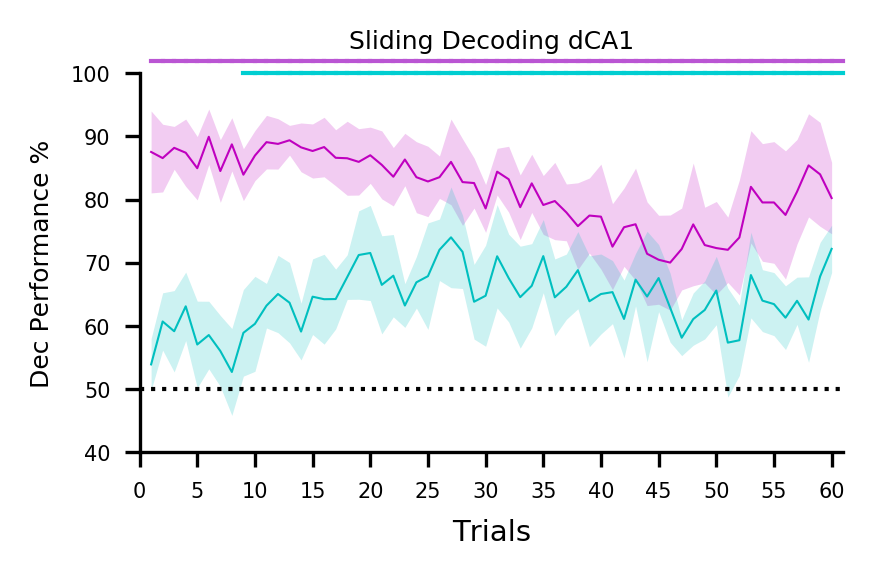

In [517]:
fig, ax = pl.subplots(1,1, figsize=(3, 2))

for tb,c in zip([6,8],['m','c']):
    ax.plot([t for t in steps_list], [(np.mean(eval("scores_tb_30_%s_%s"%(tb,t)))*100) for t in steps_list],
        color=c, ls='-',lw=.5, zorder=19 ,ms=1,label=tb)
    m = np.array([(np.mean(eval("scores_tb_30_%s_%s"%(tb,t)))*100) for t in steps_list])
    s = np.array([np.std(eval("scores_tb_30_%s_%s"%(tb,t)))*100 for t in steps_list])
    ax.fill_between([t for t in steps_list],m-s,m+s,alpha=0.2,color=c,linewidth=0)
    if tb == 6:
        for t in steps_list:
            if od_bool_to_plot[t-1]==1:
                line = Line2D([t, t+1], [102,102], lw=1, color='mediumorchid', clip_on=False)
                ax.add_line(line)
    else: 
        for t in steps_list:
             if tr_bool_to_plot[t-1]==1:
                line = Line2D([t, t+1], [100,100], lw=1, color='darkturquoise', clip_on=False)
                ax.add_line(line)
           
ax.set_xlim(0, len(vals_step)+1)
ax.set_xticks(np.arange(0,len(vals_step)+1, 5))
ax.hlines(50, 0, len(vals_step)+1, color='k', lw=1, linestyles='dotted')        

ax.set_xticklabels(np.arange(0,len(vals_step)+1, 5))
ax.set_ylim(40, 100)
ax.set_xlabel('Trials')
ax.set_ylabel('Dec Performance %',fontsize=6)
ax.set_title('Sliding Decoding dCA1', color ='k',fontsize=6)
#ax[0][0].legend(bbox_to_anchor=(.7, .99), loc='upper left', borderaxespad=0.)

fig.tight_layout(pad=2)
fig.savefig('../final-ish figures/%s_PrPo_dv.pdf'%NOTEBOOK_NAME)

In [415]:
array1 = scores_tb_30_8_51
chance = .5
subtracted = [x-chance for x in array1]
sig_func = lambda x: sstats.wilcoxon(x)
subtracted = [x-chance for x in array1]
p = sig_func(subtracted)[-1]

In [416]:
p

0.046710478727933727

In [401]:
scores_tb_30_8_1

array([ 0.585 ,  0.5325,  0.5375,  0.455 ,  0.545 ,  0.485 ,  0.5725,
        0.5525,  0.53  ,  0.595 ])

In [521]:
m_scores_6 = []
m_scores_8 = []
for tb in [6,8]:
    for t in steps_list:
        exec("m_scores_%s.append(np.mean(scores_tb_30_%s_%s*100))"%(tb,tb,t))

[53.899999999999999, 60.700000000000003, 59.149999999999999, 63.100000000000001, 57.049999999999997, 58.549999999999997, 56.024999999999999, 52.700000000000003, 58.899999999999999, 60.325000000000003, 63.200000000000003, 65.049999999999997, 63.674999999999997, 59.100000000000001, 64.625, 64.224999999999994, 64.25, 67.724999999999994, 71.224999999999994, 71.549999999999997, 66.5, 67.950000000000003, 63.225000000000001, 66.900000000000006, 67.875, 72.049999999999997, 74.025000000000006, 71.724999999999994, 63.825000000000003, 64.775000000000006]
[71.025000000000006, 67.575000000000003, 64.549999999999997, 66.349999999999994, 71.049999999999997, 64.525000000000006, 66.200000000000003, 68.825000000000003, 63.899999999999999, 65.049999999999997, 65.349999999999994, 61.100000000000001, 67.325000000000003, 64.650000000000006, 67.575000000000003, 62.875, 58.125, 61.075000000000003, 62.524999999999999, 65.599999999999994, 57.350000000000001, 57.725000000000001, 68.049999999999997, 64.0, 63.4500

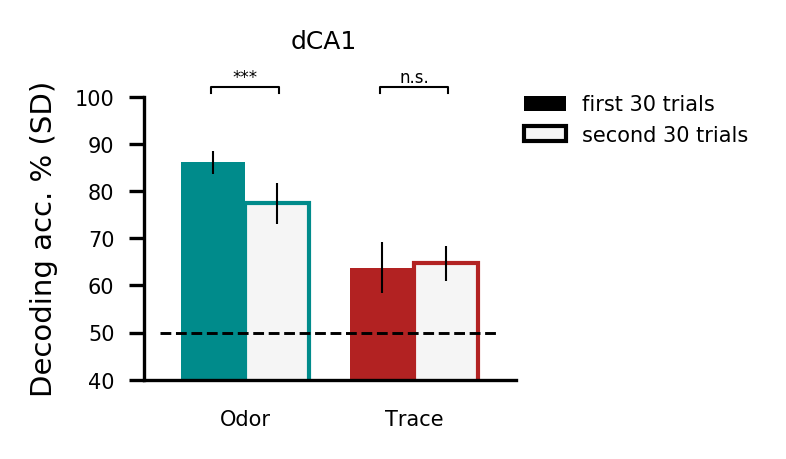

In [528]:
from matplotlib.patches import Patch
labels = ['Odor','Trace']
x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
                                      
v={}
d={}
to_plot = [1,2]

dark_co = ('forestgreen','darkcyan','firebrick','lightgrey','dimgrey','goldenrod')
fig, ax = pl.subplots(figsize=(1.6,1.25))
for c,i in zip(to_plot,range(2)):
    if c ==1:
        v = np.array(np.std(m_scores_6[0:30]))
        ax.bar(i - width/2, np.mean(m_scores_6[0:30]), width, color=dark_co[c],yerr=v)
        d = np.array(np.std(m_scores_6[30:60]))
        ax.bar(i + width/2,  np.mean(m_scores_6[30:60]), width,color='whitesmoke', edgecolor=dark_co[c],yerr=d)
    else:
        v = np.array(np.std(m_scores_8[0:30]))
        ax.bar(i - width/2, np.mean(m_scores_8[0:30]), width, color=dark_co[c],yerr=v)
        d = np.array(np.std(m_scores_8[30:60]))
        ax.bar(i + width/2,  np.mean(m_scores_8[30:60]), width,color='whitesmoke', edgecolor=dark_co[c],yerr=d)
ax.hlines(50,-.5,1.5, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Decoding acc. % (SD)')
#ax.set_title('Decoding During CS')
ax.set_ylim(40,100)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['first 30 trials','second 30 trials'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
pvs.append(add_significance(ax, m_scores_8[0:30], m_scores_8[30:60],-.2+1,0.2+1,102))
pvs.append(add_significance(ax, m_scores_6[0:30], m_scores_6[30:60],-.2+0,0.2+0,102))
        #max(np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('dCA1',y=1.06,fontsize=6)



In [533]:
save_workspace(db)

Could not store variable 'sstats'. Skipping...
Could not store variable 'di'. Skipping...
Could not store variable 'pt'. Skipping...
Could not store variable 'pl'. Skipping...
Could not store variable 'sig_func'. Skipping...
Could not store variable 'ip'. Skipping...
Could not store variable 'sys'. Skipping...
Could not store variable 'IPython'. Skipping...
Could not store variable 'ut'. Skipping...
Could not store variable 'np'. Skipping...
Could not store variable 'matplotlib'. Skipping...
Could not store variable 'pickle'. Skipping...
Could not store variable 'os'. Skipping...
